In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('loan.csv')

C:\software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pd.options.display.max_columns = None

In [4]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
raw_data.shape

(39717, 111)

In [6]:
# Get all the columns having only NaN value and drop those as those are of no use for analysis
all_nan_value_cols = [i for i in raw_data.columns if raw_data[i].isnull().sum() == 39717]
raw_data_1 = raw_data.drop(all_nan_value_cols, axis=1)

In [7]:
#This has removed removed 54 columns from dataframe
raw_data_1.shape

(39717, 57)

In [8]:
# Remove single value columns
raw_data_1 = raw_data_1.drop(['policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt', 'initial_list_status', 'pymnt_plan'], axis=1)
# Remove other columns which has no meaning in analysis or have 0 and NA values
raw_data_1 = raw_data_1.drop(['member_id', 'url', 'desc', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 'next_pymnt_d'], axis=1)

In [9]:
raw_data_1[raw_data_1['loan_status']=='Current'].shape

(1140, 44)

In [10]:
#Remove records having loan_status='Current'
raw_data_1 = raw_data_1[raw_data_1['loan_status']!='Current']

In [11]:
raw_data_1.shape

(38577, 44)

In [12]:
raw_data_1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [13]:
# Check for duplicate rows
raw_data_1[raw_data_1.duplicated()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [14]:
## check for row having all null values
raw_data_1[raw_data_1.isnull().sum(axis=1) == 57]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [15]:
# emp_length should be integer variable and will have impact on customer income so it is important element
# These could be unemployeed people or people who does not provide value so we can not fill mean or 0 value for this
# Delete rows with null emp_length value
raw_data_1 = raw_data_1[-raw_data_1.emp_length.isna()]

In [16]:
raw_data_1.shape

(37544, 44)

In [17]:
# Replace '< 1 year' with 0
# Replace years  and year with empty string and convert variable to int type
raw_data_1['emp_length'] = raw_data_1['emp_length'].apply(lambda x: int(x.replace('< 1 year','0').replace('years','').replace('year','').replace('+','')))

In [18]:
# Convert term column from object to int
raw_data_1['term'] = raw_data_1['term'].apply(lambda x: int(x.replace('months','')))

In [19]:
# Convert int_rate column from object to int
raw_data_1['int_rate'] = raw_data_1['int_rate'].apply(lambda x: float(x.replace('%','')))

In [20]:
# Extract year and month from issue_d column
raw_data_1['issue_d_year'] = pd.to_datetime(raw_data_1['issue_d'], format="%b-%y").dt.year
raw_data_1['issue_d_month'] = pd.to_datetime(raw_data_1['issue_d'], format="%b-%y").dt.month

In [21]:
# Extract year and month from earliest_cr_line column
raw_data_1['earliest_cr_line_year'] = pd.to_datetime(raw_data_1['earliest_cr_line'], format="%b-%y").dt.year
raw_data_1['earliest_cr_line_month'] = pd.to_datetime(raw_data_1['earliest_cr_line'], format="%b-%y").dt.month

In [22]:
# Convert revol_util column to float
raw_data_1['revol_util'] = raw_data_1['revol_util'].str.replace('%', '')
raw_data_1['revol_util']= raw_data_1['revol_util'].astype(float)

In [23]:
# Extract year and month from last_pymnt_d column
raw_data_1['last_pymnt_d_year'] = pd.to_datetime(raw_data_1['last_pymnt_d'], format="%b-%y").dt.year.astype('Int64')
raw_data_1['last_pymnt_d_month'] = pd.to_datetime(raw_data_1['last_pymnt_d'], format="%b-%y").dt.month.astype('Int64')

In [24]:
# Extract year and month from last_credit_pull_d column
raw_data_1['last_credit_pull_d_year'] = pd.to_datetime(raw_data_1['last_credit_pull_d'], format="%b-%y").dt.year.astype('Int64')
raw_data_1['last_credit_pull_d_month'] = pd.to_datetime(raw_data_1['last_credit_pull_d'], format="%b-%y").dt.month.astype('Int64')

In [25]:
raw_data_1.shape

(37544, 52)

In [26]:
raw_data_1.reset_index(inplace=True, drop=True)

In [27]:
raw_data_2 = raw_data_1

In [28]:
raw_data_2.shape

(37544, 52)

In [29]:
pd.set_option('display.max_rows', 200)

In [30]:
raw_data_2.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
count,3.754400e+04,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,3.754400e+04,37544.000000,37544.000000,37544.000000,13338.000000,2621.000000,37544.000000,37544.000000,37544.000000,37497.000000,37544.000000,37544.0,37544.0,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,36847.000000,37544.000000,37544.000000,37544.000000,37544.000000,37478.000000,37478.000000,37542.000000,37542.000000
mean,6.743002e+05,11119.329986,10853.560489,10280.495739,41.917537,11.963319,324.650164,4.940976,6.940708e+04,13.284186,0.147107,0.872390,35.818863,68.018695,9.298476,0.053724,13363.702562,48.861742,22.083875,0.0,0.0,11957.010792,11348.809823,9720.124658,2137.018706,1.378980,98.488534,12.815757,2769.442228,0.041794,2010.298530,7.112881,1996.896921,6.897374,2012.718075,6.480815,2014.234111,5.839167
std,2.098464e+05,7354.098954,7096.316776,7034.124211,10.344394,3.683012,208.901055,3.557082,6.467698e+04,6.660551,0.493479,1.071003,22.019524,44.395611,4.396229,0.234622,15894.970643,28.341493,11.416494,0.0,0.0,8823.936817,8719.604728,7020.466734,2395.346010,7.360282,704.389292,151.989005,4514.772596,0.200799,0.889106,3.410257,7.048583,3.539352,1.465156,3.471241,1.798227,3.062497
min,5.473400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.000000,1969.000000,1.000000,2008.000000,1.000000,2007.000000,1.000000
25%,5.091155e+05,5500.000000,5400.000000,5000.000000,36.000000,8.940000,167.370000,2.000000,4.100000e+04,8.160000,0.000000,0.000000,18.000000,0.000000,6.000000,0.000000,3693.000000,25.400000,13.000000,0.0,0.0,5565.271934,5074.037500,4552.150000,655.317500,0.000000,0.000000,0.000000,220.820000,0.000000,2010.000000,4.000000,1994.000000,4.000000,2012.000000,3.000000,2013.000000,4.000000
50%,6.534655e+05,10000.000000,9600.000000,8850.000000,36.000000,11.830000,280.000000,4.000000,6.000000e+04,13.380000,0.000000,1.000000,34.000000,89.000000,9.000000,0.000000,8840.500000,49.300000,20.000000,0.0,0.0,9777.765034,9159.695000,8000.000000,1321.210000,0.000000,0.000000,0.000000,578.540000,0.000000,2011.000000,7.000000,1998.000000,7.000000,2013.000000,6.000000,2015.000000,5.000000
75%,8.269000e+05,15000.000000,15000.000000,14075.000000,36.000000,14.420000,428.942500,9.000000,8.300000e+04,18.550000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17009.000000,72.400000,29.000000,0.0,0.0,16243.811330,15442.962500,13263.315000,2697.102500,0.000000,0.000000,0.000000,3494.710000,0.000000,2011.000000,10.000000,2001.000000,10.000000,2014.000000,10.000000,2016.000000,8.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,2011.000000,12.000000,2068.000000,12.000000,2016.000000,12.000000,2016.000000,12.000000


<AxesSubplot:>

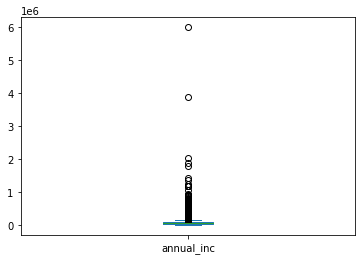

In [31]:
raw_data_2['annual_inc'].plot.box()

In [32]:
raw_data_2.annual_inc.quantile(0.95) # 90th percentile

142000.0

In [33]:
# There is huge variation in annual_inc so need to remove outliers from this
raw_data_2 = raw_data_2[raw_data_2['annual_inc'] < raw_data_2.annual_inc.quantile(0.95)]

In [34]:
raw_data_2.shape

(35662, 52)

<AxesSubplot:>

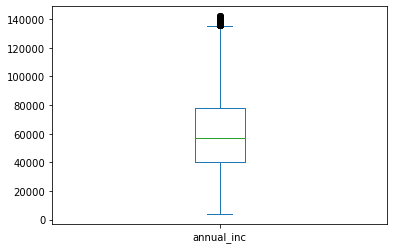

In [35]:
raw_data_2['annual_inc'].plot.box()

In [36]:
raw_data_2.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
count,3.566200e+04,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,12609.000000,2535.000000,35662.000000,35662.000000,35662.000000,35617.00000,35662.000000,35662.0,35662.0,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,35662.000000,35004.000000,35662.000000,35662.000000,35662.000000,35662.000000,35596.000000,35596.000000,35660.000000,35660.000000
mean,6.739278e+05,10750.273400,10501.524031,9947.871335,41.867085,11.918845,313.958890,4.900959,61428.911805,13.458154,0.145617,0.864786,35.906733,68.590533,9.189305,0.055073,12375.933431,48.81600,21.669284,0.0,0.0,11527.419975,10942.249368,9379.174621,2051.370501,1.344318,95.530619,12.217430,2650.015761,0.042967,2010.297516,7.105687,1997.097246,6.899669,2012.715249,6.487471,2014.238110,5.843887
std,2.098125e+05,7052.225842,6804.713974,6739.575502,10.314569,3.658307,199.458109,3.546643,27736.943017,6.649307,0.491617,1.063714,22.011253,44.173739,4.346749,0.237047,13773.439452,28.25865,11.221743,0.0,0.0,8420.700155,8317.806083,6709.413779,2278.779174,7.178077,685.781548,146.667972,4323.041230,0.203488,0.887765,3.413218,6.918362,3.539301,1.461091,3.470686,1.791317,3.065262
min,5.473400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.000000,1969.000000,1.000000,2008.000000,1.000000,2007.000000,1.000000
25%,5.093182e+05,5050.000000,5000.000000,5000.000000,36.000000,8.940000,164.550000,2.000000,40000.000000,8.372500,0.000000,0.000000,18.000000,5.500000,6.000000,0.000000,3596.000000,25.50000,13.000000,0.0,0.0,5470.915802,4960.902500,4483.525000,639.642500,0.000000,0.000000,0.000000,215.432500,0.000000,2010.000000,4.000000,1994.000000,4.000000,2012.000000,3.000000,2013.000000,4.000000
50%,6.525935e+05,9500.000000,9050.000000,8404.030000,36.000000,11.710000,272.950000,4.000000,57000.000000,13.600000,0.000000,1.000000,34.000000,89.000000,8.000000,0.000000,8588.500000,49.20000,20.000000,0.0,0.0,9464.612472,8893.265000,8000.000000,1276.945000,0.000000,0.000000,0.000000,553.455000,0.000000,2011.000000,7.000000,1998.000000,7.000000,2013.000000,6.000000,2015.000000,5.000000
75%,8.258155e+05,15000.000000,14400.000000,13733.186140,36.000000,14.350000,411.190000,9.000000,78000.000000,18.700000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,16229.250000,72.20000,28.000000,0.0,0.0,15558.184665,14854.650000,12700.000000,2583.770000,0.000000,0.000000,0.000000,3346.950000,0.000000,2011.000000,10.000000,2001.000000,10.000000,2014.000000,10.000000,2016.000000,8.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,141996.000000,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149000.000000,99.90000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,2011.000000,12.000000,2068.000000,12.000000,2016.000000,12.000000,2016.000000,12.000000


<AxesSubplot:>

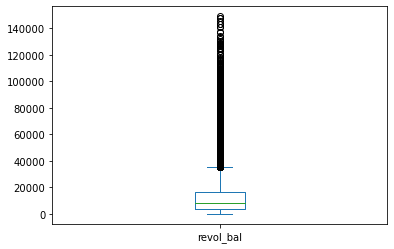

In [37]:
raw_data_2[ 'revol_bal'].plot.box()

In [38]:
raw_data_2.revol_bal.quantile(0.95) # 95th percentile

36969.49999999997

In [39]:
raw_data_2[ 'revol_bal'].describe()

count     35662.000000
mean      12375.933431
std       13773.439452
min           0.000000
25%        3596.000000
50%        8588.500000
75%       16229.250000
max      149000.000000
Name: revol_bal, dtype: float64

In [40]:
raw_data_2 = raw_data_2[raw_data_2[ 'revol_bal']<raw_data_2.revol_bal.quantile(0.95)]

In [41]:
raw_data_2.shape

(33878, 52)

<AxesSubplot:>

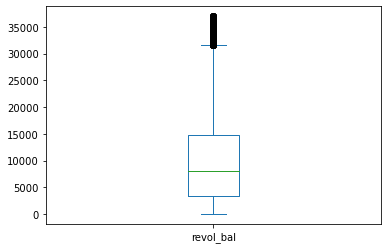

In [42]:
raw_data_2['revol_bal'].plot.box()

In [43]:
raw_data_2['total_acc'].describe()

count    33878.000000
mean        21.213118
std         11.049373
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [44]:
data = raw_data_2

<AxesSubplot:ylabel='Frequency'>

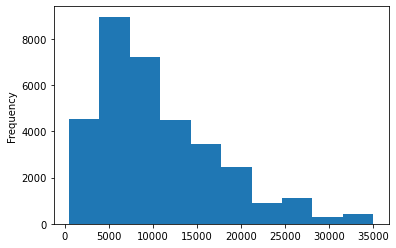

In [45]:
data['loan_amnt'].plot.hist(bins=10)

In [46]:
ranges = [0,5000,10000,15000,20000,25000,30000,35000,40000,45000]
data.groupby([pd.cut(data.loan_amnt, ranges), 'loan_status'])['loan_status'].count()

loan_amnt       loan_status
(0, 5000]       Charged Off     1177
                Fully Paid      7493
(5000, 10000]   Charged Off     1472
                Fully Paid     10140
(10000, 15000]  Charged Off      956
                Fully Paid      5940
(15000, 20000]  Charged Off      652
                Fully Paid      3047
(20000, 25000]  Charged Off      429
                Fully Paid      1653
(25000, 30000]  Charged Off      112
                Fully Paid       381
(30000, 35000]  Charged Off      125
                Fully Paid       301
(35000, 40000]  Charged Off        0
                Fully Paid         0
(40000, 45000]  Charged Off        0
                Fully Paid         0
Name: loan_status, dtype: int64

In [47]:
ranges = [0,5000,10000,15000,20000,25000,30000,35000,40000,45000]
df_loan_amnt = data.groupby([pd.cut(data.loan_amnt, ranges), 'loan_status'])['loan_status'].count()
df_loan_amnt_pcts = df_loan_amnt.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_loan_amnt_pcts
#Higher the loan amount there is high chance of being Charged Off
#As you see below percentage of charged off increases as amount increase

loan_amnt       loan_status
(0, 5000]       Charged Off    13.575548
                Fully Paid     86.424452
(5000, 10000]   Charged Off    12.676542
                Fully Paid     87.323458
(10000, 15000]  Charged Off    13.863109
                Fully Paid     86.136891
(15000, 20000]  Charged Off    17.626386
                Fully Paid     82.373614
(20000, 25000]  Charged Off    20.605187
                Fully Paid     79.394813
(25000, 30000]  Charged Off    22.718053
                Fully Paid     77.281947
(30000, 35000]  Charged Off    29.342723
                Fully Paid     70.657277
(35000, 40000]  Charged Off          NaN
                Fully Paid           NaN
(40000, 45000]  Charged Off          NaN
                Fully Paid           NaN
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

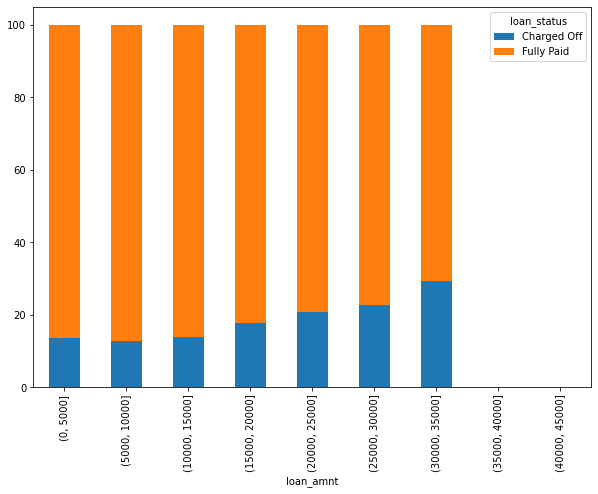

In [48]:
df_loan_amnt.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar',stacked=True, figsize=(10,7))

In [49]:
ranges = [0,5000,10000,15000,20000,25000,30000,35000,40000,45000]
df_funded_amnt_inv=data.groupby([pd.cut(data.funded_amnt_inv, ranges), 'loan_status'])['loan_status'].count()
funded_amnt_inv_pcts = df_funded_amnt_inv.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
funded_amnt_inv_pcts

funded_amnt_inv  loan_status
(0, 5000]        Charged Off    14.278297
                 Fully Paid     85.721703
(5000, 10000]    Charged Off    12.677520
                 Fully Paid     87.322480
(10000, 15000]   Charged Off    13.952802
                 Fully Paid     86.047198
(15000, 20000]   Charged Off    18.181818
                 Fully Paid     81.818182
(20000, 25000]   Charged Off    19.437799
                 Fully Paid     80.562201
(25000, 30000]   Charged Off    19.540230
                 Fully Paid     80.459770
(30000, 35000]   Charged Off    28.000000
                 Fully Paid     72.000000
(35000, 40000]   Charged Off          NaN
                 Fully Paid           NaN
(40000, 45000]   Charged Off          NaN
                 Fully Paid           NaN
Name: loan_status, dtype: float64

In [50]:
data['term'].value_counts()

36    25698
60     8180
Name: term, dtype: int64

<AxesSubplot:>

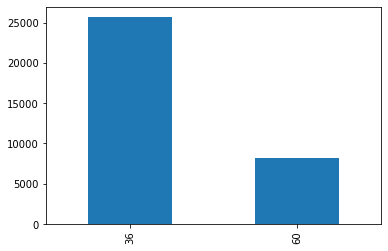

In [51]:
data['term'].value_counts().plot.bar()

In [52]:
group = pd.pivot_table(index='loan_status', columns='term',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
#26% of the customer who has given loan for 60 term have loan_status=Charged Off

term,36,60,All
loan_status,,,
Charged Off,10.965834,25.733496,14.531554
Fully Paid,89.034166,74.266504,85.468446


<AxesSubplot:ylabel='Frequency'>

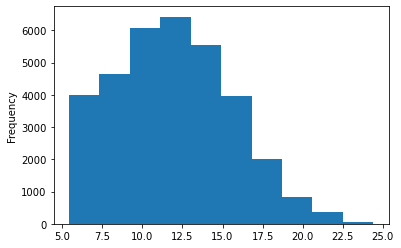

In [53]:
data['int_rate'].plot.hist(bins=10)

In [54]:
ranges = [0,5,10,15,20,25,30]
data.groupby(pd.cut(data.int_rate, ranges))['id'].count()
#for most borrowers interest rates varies from 5% to 20%

int_rate
(0, 5]          0
(5, 10]     10819
(10, 15]    16173
(15, 20]     6262
(20, 25]      624
(25, 30]        0
Name: id, dtype: int64

In [55]:
ranges = [0,5,10,15,20,25,30]
df_int_rate = data.groupby([pd.cut(data.int_rate, ranges), 'loan_status'])['loan_status'].count()
df_int_rate_pcts = df_int_rate.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_int_rate_pcts
#We have divided the int_rate into bins
# As the interest rate increases, there is high chance of customer being Charged Off

int_rate  loan_status
(0, 5]    Charged Off          NaN
          Fully Paid           NaN
(5, 10]   Charged Off     6.507071
          Fully Paid     93.492929
(10, 15]  Charged Off    14.839547
          Fully Paid     85.160453
(15, 20]  Charged Off    25.055893
          Fully Paid     74.944107
(20, 25]  Charged Off    40.064103
          Fully Paid     59.935897
(25, 30]  Charged Off          NaN
          Fully Paid           NaN
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='int_rate'>

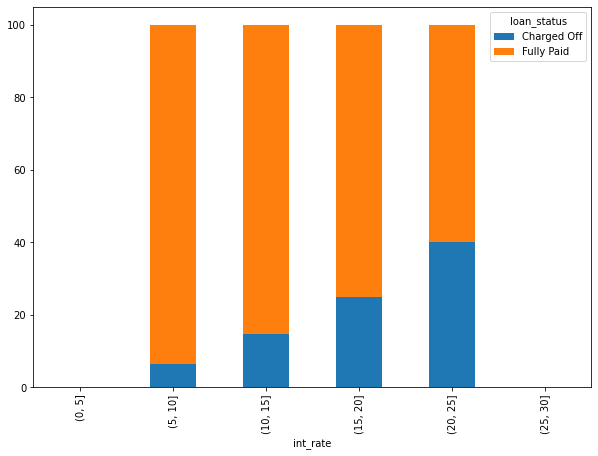

In [56]:
df_int_rate.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar',stacked=True, figsize=(10,7))

<AxesSubplot:ylabel='Frequency'>

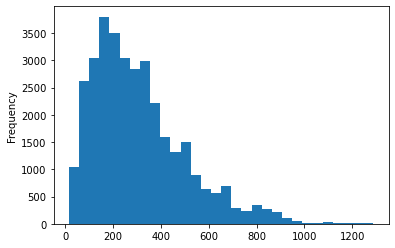

In [57]:
data['installment'].plot.hist(bins=30)

In [58]:
ranges = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]
data.groupby(pd.cut(data.installment, ranges))['id'].count()
#For most customer installment varies from 100 to 600

installment
(0, 100]        3613
(100, 200]      8319
(200, 300]      6923
(300, 400]      6381
(400, 500]      3473
(500, 600]      2185
(600, 700]      1420
(700, 800]       601
(800, 900]       685
(900, 1000]      168
(1000, 1100]      50
(1100, 1200]      41
(1200, 1300]      19
(1300, 1400]       0
(1400, 1500]       0
Name: id, dtype: int64

In [59]:
ranges = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]
df_installment = data.groupby([pd.cut(data.installment, ranges), 'loan_status'])['loan_status'].count()
df_installment_pcts = df_installment.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_installment_pcts
#No relationship found

installment   loan_status
(0, 100]      Charged Off    14.669250
              Fully Paid     85.330750
(100, 200]    Charged Off    13.210722
              Fully Paid     86.789278
(200, 300]    Charged Off    13.910155
              Fully Paid     86.089845
(300, 400]    Charged Off    14.041686
              Fully Paid     85.958314
(400, 500]    Charged Off    15.231788
              Fully Paid     84.768212
(500, 600]    Charged Off    17.208238
              Fully Paid     82.791762
(600, 700]    Charged Off    16.690141
              Fully Paid     83.309859
(700, 800]    Charged Off    17.803661
              Fully Paid     82.196339
(800, 900]    Charged Off    18.248175
              Fully Paid     81.751825
(900, 1000]   Charged Off    27.976190
              Fully Paid     72.023810
(1000, 1100]  Charged Off    12.000000
              Fully Paid     88.000000
(1100, 1200]  Charged Off    12.195122
              Fully Paid     87.804878
(1200, 1300]  Charged Off    15.789474

<AxesSubplot:xlabel='installment'>

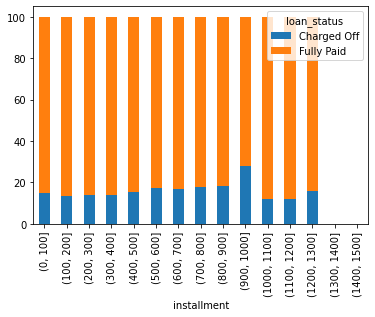

In [60]:
df_installment.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar',stacked=True)

<AxesSubplot:>

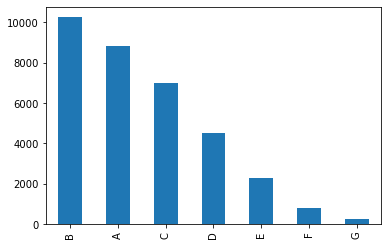

In [61]:
data['grade'].value_counts().plot(kind='bar')

In [62]:
data['grade'].value_counts()

B    10264
A     8841
C     6967
D     4493
E     2264
F      807
G      242
Name: grade, dtype: int64

In [63]:
data['grade'].value_counts(normalize=True) * 100

B    30.296948
A    26.096582
C    20.564968
D    13.262294
E     6.682803
F     2.382077
G     0.714328
Name: grade, dtype: float64

In [64]:
#As this is ordered categorical variable, check if it follow power law distribution
grade_value_counts = data['grade'].value_counts()
df_grade_value_counts = pd.DataFrame(grade_value_counts)
df_grade_value_counts = df_grade_value_counts.reset_index()
df_grade_value_counts.columns = ['grade', 'frequency'] # change column names
df_grade_value_counts['rank'] = range(1,8)
df_grade_value_counts['log_frequency'] = np.log(df_grade_value_counts['frequency'])
df_grade_value_counts

,grade,frequency,rank,log_frequency
0,B,10264,1,9.236398
1,A,8841,2,9.087155
2,C,6967,3,8.848940
3,D,4493,4,8.410276
4,E,2264,5,7.724888
5,F,807,6,6.693324
6,G,242,7,5.488938


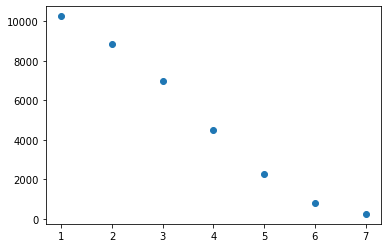

In [65]:
plt.scatter(x='rank', y='frequency', data=df_grade_value_counts)
#rank vs frequency (not log of frequency) follow power law distribution

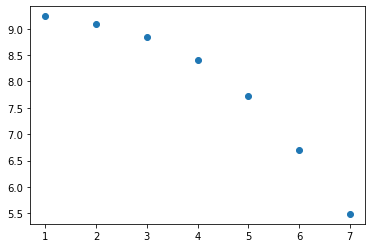

In [66]:
plt.scatter(x='rank', y='log_frequency', data=df_grade_value_counts)

In [67]:
group = pd.pivot_table(index='loan_status', columns='grade',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
#Customers having grade E, F, G have high percentage of charged off

grade,A,B,C,D,E,F,G,All
loan_status,,,,,,,,
Charged Off,5.859066,12.129774,17.180996,22.167817,27.120141,32.589839,37.190083,14.531554
Fully Paid,94.140934,87.870226,82.819004,77.832183,72.879859,67.410161,62.809917,85.468446


<AxesSubplot:xlabel='grade'>

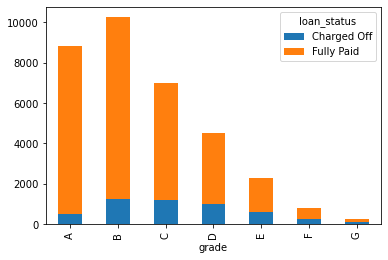

In [68]:
data.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

In [69]:
group = pd.pivot_table(index='loan_status', columns='sub_grade',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
#Customers having sub_grade which are child of E, F, G have high percentage of charged off

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,All
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,2.263374,5.007474,5.230386,5.992949,8.094435,8.905852,10.947249,12.159414,13.361266,14.039621,15.734649,16.714697,18.470855,17.783985,18.262586,17.844311,21.4223,23.319756,23.181258,25.619835,27.401575,27.186312,23.474178,29.558011,28.571429,28.4,31.088083,29.452055,33.333333,52.325581,35.0,39.68254,46.153846,27.5,40.0,14.531554
Fully Paid,97.736626,94.992526,94.769614,94.007051,91.905565,91.094148,89.052751,87.840586,86.638734,85.960379,84.265351,83.285303,81.529145,82.216015,81.737414,82.155689,78.5777,76.680244,76.818742,74.380165,72.598425,72.813688,76.525822,70.441989,71.428571,71.6,68.911917,70.547945,66.666667,47.674419,65.0,60.31746,53.846154,72.5,60.0,85.468446


<AxesSubplot:xlabel='sub_grade'>

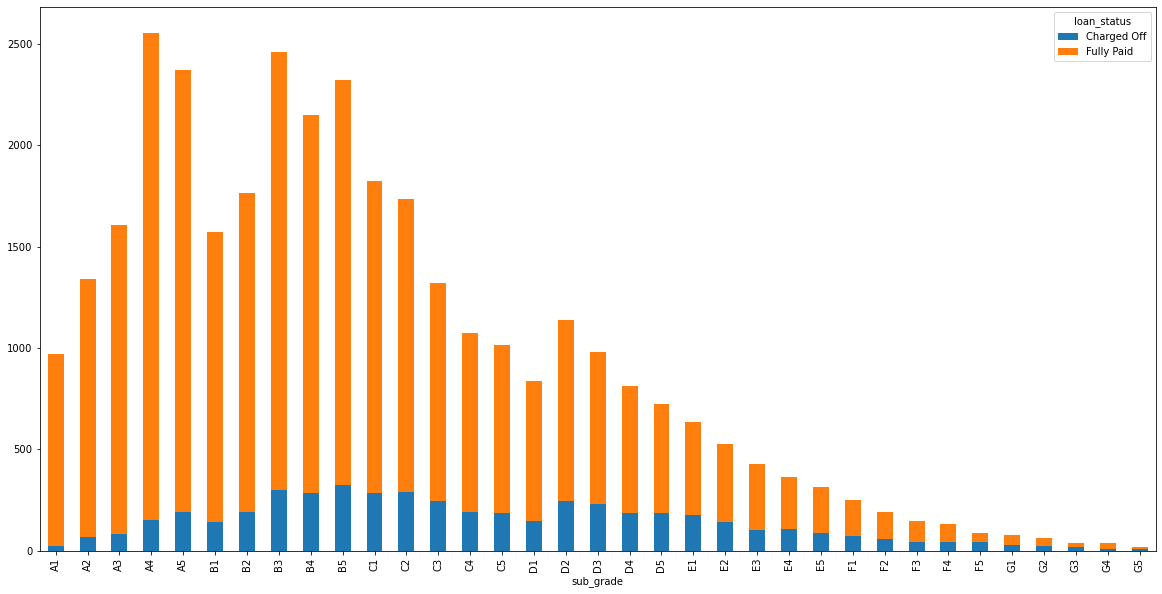

In [70]:
data.groupby('sub_grade')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True, figsize=(20,10))

In [71]:
data['emp_length'].value_counts(normalize=True) * 100
# Most customers have employment length 10+ years

10    21.175984
0     12.379715
2     11.739182
3     10.924494
4      9.103253
1      8.657536
5      8.625066
6      5.832694
7      4.598855
8      3.745794
9      3.217427
Name: emp_length, dtype: float64

<AxesSubplot:>

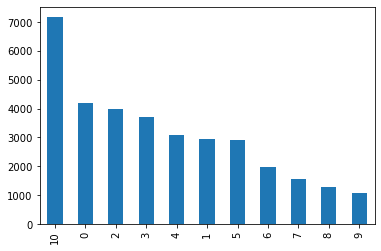

In [72]:
data['emp_length'].value_counts().plot(kind='bar')

In [73]:
#Check if emp_length follow power law distribution or not
emp_length_value_counts = data['emp_length'].value_counts()
df_emp_length_value_counts = pd.DataFrame(emp_length_value_counts)
df_emp_length_value_counts = df_emp_length_value_counts.reset_index()
df_emp_length_value_counts.columns = ['emp_length', 'frequency'] # change column names
df_emp_length_value_counts['rank'] = range(1,12)
df_emp_length_value_counts['log_frequency'] = np.log(df_emp_length_value_counts['frequency'])
df_emp_length_value_counts

,emp_length,frequency,rank,log_frequency
0,10,7174,1,8.878219
1,0,4194,2,8.341410
2,2,3977,3,8.288283
3,3,3701,4,8.216358
4,4,3084,5,8.033983
5,1,2933,6,7.983781
6,5,2922,7,7.980024
7,6,1976,8,7.588830
8,7,1558,9,7.351158
9,8,1269,10,7.145984


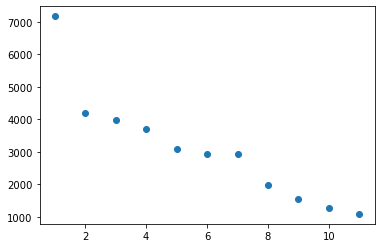

In [74]:
plt.scatter(x='rank', y='frequency', data=df_emp_length_value_counts)

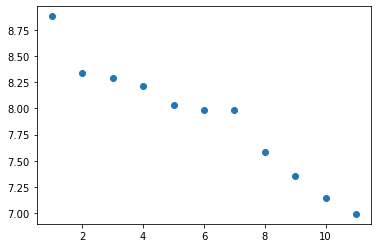

In [75]:
plt.scatter(x='rank', y='log_frequency', data=df_emp_length_value_counts)
#emp_length approximately follow Power Law Distribution"

In [76]:
group = pd.pivot_table(index='loan_status', columns='emp_length',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
#16% of the emp_length=10 year have loan_status=Charged Off, this may be because they are too old to repay loan

emp_length,0,1,2,3,4,5,6,7,8,9,10,All
loan_status,,,,,,,,,,,,
Charged Off,14.139247,14.490283,13.402062,14.158336,13.683528,14.442163,14.423077,15.019255,14.184397,13.119266,16.197379,14.531554
Fully Paid,85.860753,85.509717,86.597938,85.841664,86.316472,85.557837,85.576923,84.980745,85.815603,86.880734,83.802621,85.468446


<AxesSubplot:xlabel='emp_length'>

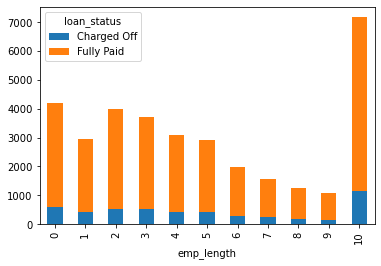

In [77]:
data.groupby('emp_length')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

<AxesSubplot:>

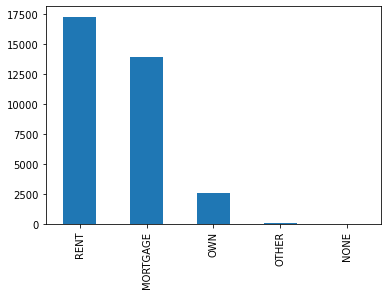

In [78]:
data['home_ownership'].value_counts().plot(kind='bar')

In [79]:
group = pd.pivot_table(index='loan_status', columns='home_ownership',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
#Customers for which home_ownership=OTHER, slightly high chance of loan_status=Charged Off 
#but there are very low count of such customers so difficult to conclude

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT,All
loan_status,,,,,,
Charged Off,13.790873,NaN,18.478261,14.732317,15.078861,14.531554
Fully Paid,86.209127,100.0,81.521739,85.267683,84.921139,85.468446


In [80]:
group = pd.pivot_table(index='home_ownership', columns='loan_status',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
#50% of total charged off are from home_ownership=RENT

loan_status,Charged Off,Fully Paid,All
home_ownership,,,
MORTGAGE,38.980297,41.429805,41.073853
NONE,NaN,0.010361,0.008855
OTHER,0.345318,0.259023,0.271563
OWN,7.657932,7.535831,7.553575
RENT,53.016453,50.764980,51.092154


<AxesSubplot:xlabel='home_ownership'>

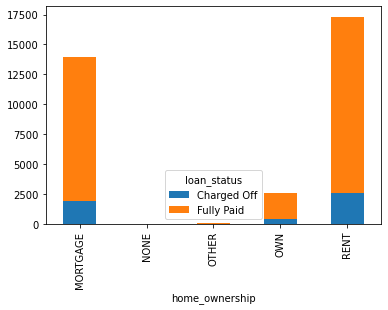

In [81]:
data.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

<AxesSubplot:ylabel='Frequency'>

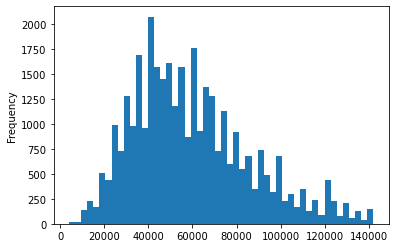

In [82]:
data['annual_inc'].plot.hist(bins=50)

In [83]:
data['annual_inc'].describe()

count     33878.000000
mean      59705.149022
std       26786.428172
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      141996.000000
Name: annual_inc, dtype: float64

In [84]:
ranges = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000, 250000]
data.groupby([pd.cut(data.annual_inc, ranges), 'loan_status'])['loan_status'].count()

annual_inc        loan_status
(0, 25000]        Charged Off      419
                  Fully Paid      1854
(25000, 50000]    Charged Off     2006
                  Fully Paid     10343
(50000, 75000]    Charged Off     1574
                  Fully Paid      9460
(75000, 100000]   Charged Off      629
                  Fully Paid      4738
(100000, 125000]  Charged Off      226
                  Fully Paid      1958
(125000, 150000]  Charged Off       69
                  Fully Paid       602
(150000, 175000]  Charged Off        0
                  Fully Paid         0
(175000, 200000]  Charged Off        0
                  Fully Paid         0
(200000, 225000]  Charged Off        0
                  Fully Paid         0
(225000, 250000]  Charged Off        0
                  Fully Paid         0
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='annual_inc'>

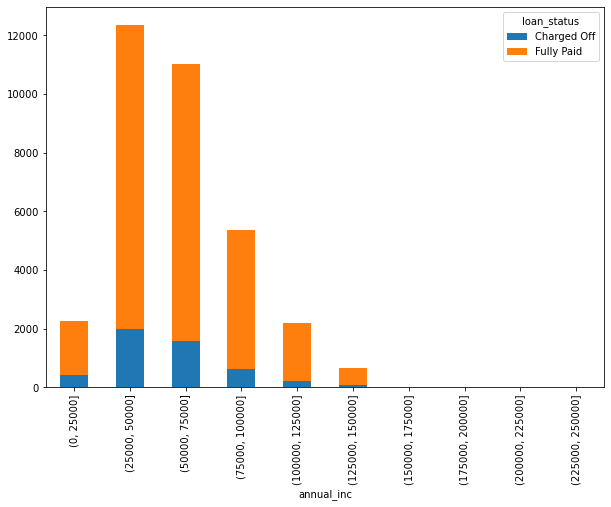

In [85]:
ranges = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000, 250000]
data.groupby([pd.cut(data.annual_inc, ranges), 'loan_status'])['loan_status'].count().unstack().plot(kind='bar',stacked=True, figsize=(10,7))
# As annual income increases, chance of getting charged off decreases

In [86]:
ranges = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000, 250000]
df_annual_inc = data.groupby([pd.cut(data.annual_inc, ranges), 'loan_status'])['loan_status'].count()
df_annual_inc_pcts = df_annual_inc.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_annual_inc_pcts
#If we group the annual_income data into bins, then lower income customer have high chance of being Charged Off

annual_inc        loan_status
(0, 25000]        Charged Off    18.433788
                  Fully Paid     81.566212
(25000, 50000]    Charged Off    16.244230
                  Fully Paid     83.755770
(50000, 75000]    Charged Off    14.264999
                  Fully Paid     85.735001
(75000, 100000]   Charged Off    11.719769
                  Fully Paid     88.280231
(100000, 125000]  Charged Off    10.347985
                  Fully Paid     89.652015
(125000, 150000]  Charged Off    10.283159
                  Fully Paid     89.716841
(150000, 175000]  Charged Off          NaN
                  Fully Paid           NaN
(175000, 200000]  Charged Off          NaN
                  Fully Paid           NaN
(200000, 225000]  Charged Off          NaN
                  Fully Paid           NaN
(225000, 250000]  Charged Off          NaN
                  Fully Paid           NaN
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

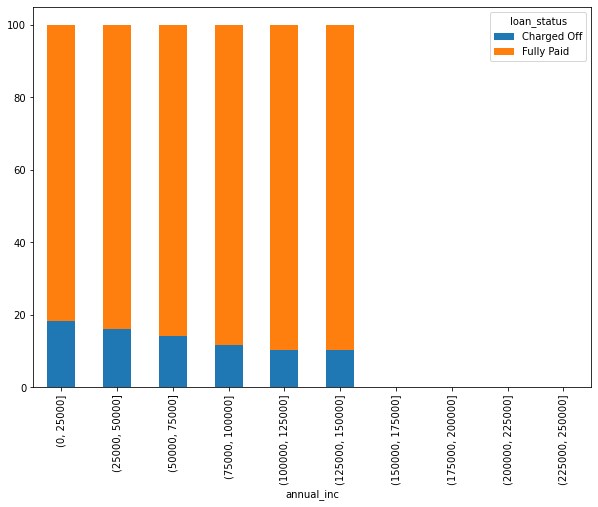

In [87]:
df_annual_inc.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar',stacked=True, figsize=(10,7))

<AxesSubplot:>

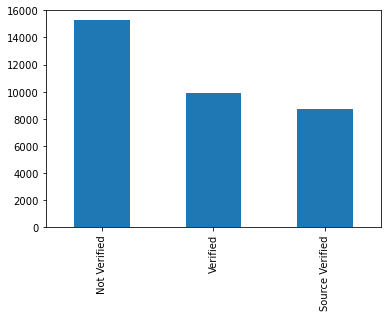

In [88]:
data['verification_status'].value_counts().plot(kind='bar')

In [89]:
# pivot table for verification_status and loan_status
group = pd.pivot_table(index='loan_status', columns='verification_status',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

verification_status,Not Verified,Source Verified,Verified,All
loan_status,,,,
Charged Off,12.511463,14.875273,17.340866,14.531554
Fully Paid,87.488537,85.124727,82.659134,85.468446


<AxesSubplot:xlabel='verification_status'>

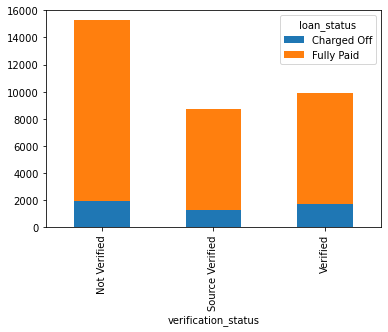

In [90]:
data.groupby('verification_status')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

In [91]:
# pivot table for verification_status and loan_status
group = pd.pivot_table(index='verification_status', columns='loan_status',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

loan_status,Charged Off,Fully Paid,All
verification_status,,,
Not Verified,38.797481,46.126748,45.061692
Source Verified,26.284786,25.574167,25.677431
Verified,34.917733,28.299085,29.260877


<AxesSubplot:>

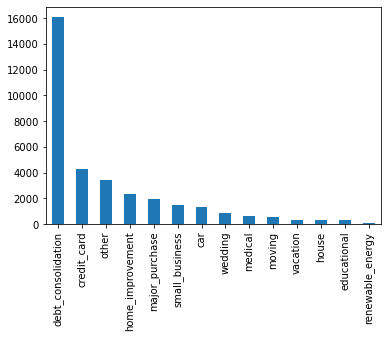

In [92]:
data['purpose'].value_counts().plot(kind='bar')

In [93]:
# pivot table for purpose and loan_status
group = pd.pivot_table(index='loan_status', columns='purpose',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
#Around 50% of the customers have taken loan for “debt_consolidation”
#Around 27.5% of the customer who have taken loan for “small_business” are charged off. So, purpose of loan is the crucial factor to avoid charged off. Out of these around 33% are not verified
#Around 20% of the customer who have taken loan for “renewable_energy” are charged off, out of those 47% are not verified.
#So are should be taken while providing loan for small_business and renewable_energy

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,All
loan_status,,,,,,,,,,,,,,,
Charged Off,11.085801,10.294459,15.298577,16.438356,12.382979,16.346154,10.619469,16.193656,15.697674,15.746181,20.0,27.560647,14.848485,10.208817,14.531554
Fully Paid,88.914199,89.705541,84.701423,83.561644,87.617021,83.653846,89.380531,83.806344,84.302326,84.253819,80.0,72.439353,85.151515,89.791183,85.468446


In [94]:
# pivot table for purpose and loan_status
group = pd.pivot_table(index='purpose', columns='loan_status',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

loan_status,Charged Off,Fully Paid,All
purpose,,,
car,2.965671,4.044207,3.887479
credit_card,9.018891,13.362114,12.730976
debt_consolidation,50.010156,47.076498,47.502804
educational,0.975015,0.842687,0.861916
home_improvement,5.911030,7.111034,6.936655
house,1.035954,0.901399,0.920952
major_purchase,4.143815,5.929891,5.670347
medical,1.970343,1.733725,1.768109
moving,1.645338,1.502331,1.523112


<AxesSubplot:xlabel='purpose'>

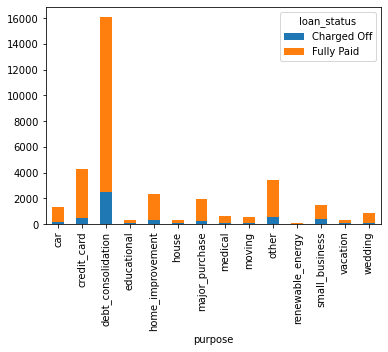

In [95]:
data.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='purpose'>

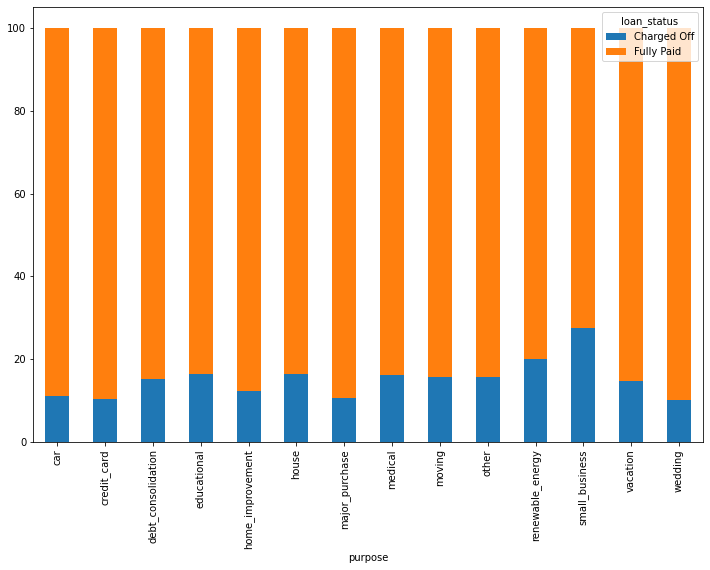

In [96]:
df_purpose_loanstatus = data.groupby('purpose')['loan_status'].value_counts()
df_purpose_loanstatus.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar',stacked=True, figsize=(12,8))

In [97]:
group = pd.pivot_table(index='addr_state', columns='loan_status',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

loan_status,Charged Off,Fully Paid,All
addr_state,,,
AK,0.243754,0.186496,0.194817
AL,0.975015,1.160421,1.133479
AR,0.467195,0.666552,0.637582
AZ,2.112533,2.161975,2.154791
CA,19.642494,17.654982,17.943798
CO,1.726589,2.061820,2.013106
CT,1.584400,1.840787,1.803530
DC,0.264067,0.604386,0.554932
DE,0.223441,0.293559,0.283370


In [98]:
group = pd.pivot_table(index='loan_status', columns='addr_state',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
# Care should be taken while providing loan to customer from addr_state=NV, as 20% of those are charged off
#Also for addr_state=FL

addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,18.181818,12.5,10.648148,14.246575,15.907222,12.463343,12.765957,6.914894,11.458333,18.252666,16.062176,17.647059,NaN,20.0,14.020139,NaN,10.859729,15.302491,12.765957,12.0,15.765766,NaN,14.043993,13.653137,16.638935,11.111111,13.513514,16.066066,75.0,14.893617,16.635041,16.568047,20.763723,13.286067,12.735849,14.498141,16.751269,11.795642,12.280702,13.93643,17.54386,6.666667,11.857877,15.454545,13.468013,9.615385,15.263909,12.919897,13.375796,3.947368,14.531554
Fully Paid,81.818182,87.5,89.351852,85.753425,84.092778,87.536657,87.234043,93.085106,88.541667,81.747334,83.937824,82.352941,100.0,80.0,85.979861,100.0,89.140271,84.697509,87.234043,88.0,84.234234,100.0,85.956007,86.346863,83.361065,88.888889,86.486486,83.933934,25.0,85.106383,83.364959,83.431953,79.236277,86.713933,87.264151,85.501859,83.248731,88.204358,87.719298,86.06357,82.45614,93.333333,88.142123,84.545455,86.531987,90.384615,84.736091,87.080103,86.624204,96.052632,85.468446


<AxesSubplot:xlabel='addr_state'>

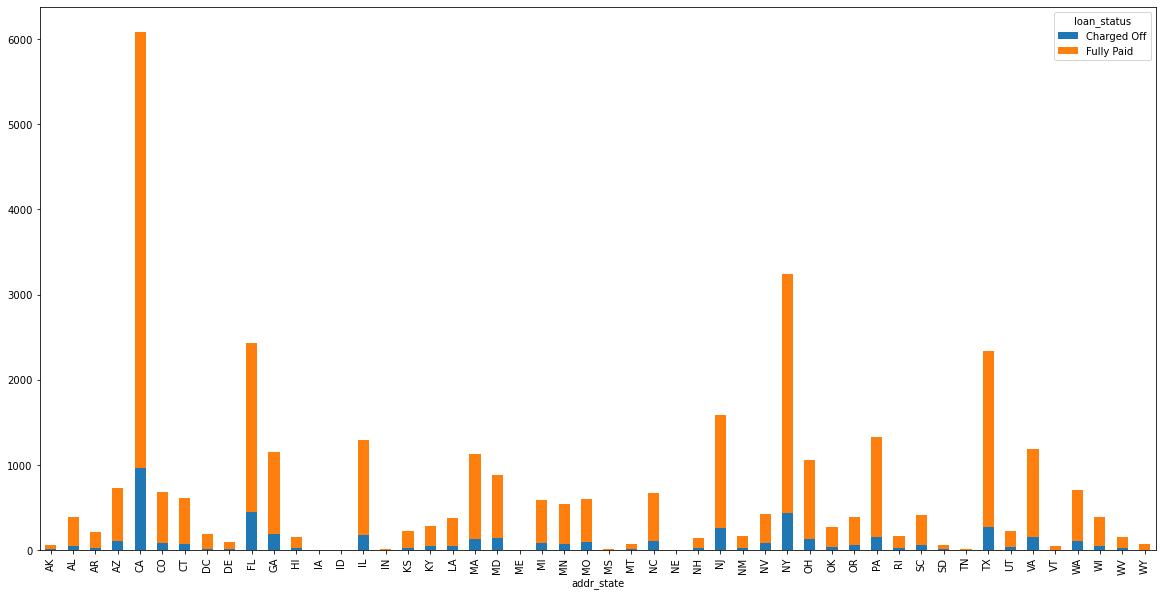

In [99]:
data.groupby('addr_state')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True, figsize=(20,10))

<AxesSubplot:ylabel='Frequency'>

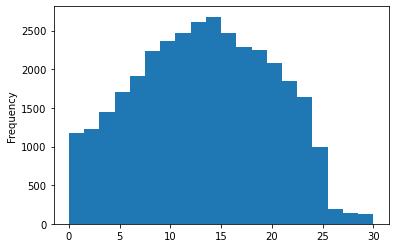

In [100]:
data['dti'].plot.hist(bins=20)

In [101]:
ranges = [0,5,10,15,20,25,30,35]
data.groupby([pd.cut(data.dti, ranges), 'loan_status'])['loan_status'].count()

dti       loan_status
(0, 5]    Charged Off     537
          Fully Paid     3725
(5, 10]   Charged Off     884
          Fully Paid     5994
(10, 15]  Charged Off    1238
          Fully Paid     7335
(15, 20]  Charged Off    1204
          Fully Paid     6530
(20, 25]  Charged Off     961
          Fully Paid     4775
(25, 30]  Charged Off      73
          Fully Paid      462
(30, 35]  Charged Off       0
          Fully Paid        0
Name: loan_status, dtype: int64

In [102]:
ranges = [0,5,10,15,20,25,30,35]
df_dti=data.groupby([pd.cut(data.dti, ranges), 'loan_status'])['loan_status'].count()
df_dti_pcts = df_dti.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_dti_pcts

dti       loan_status
(0, 5]    Charged Off    12.599718
          Fully Paid     87.400282
(5, 10]   Charged Off    12.852573
          Fully Paid     87.147427
(10, 15]  Charged Off    14.440686
          Fully Paid     85.559314
(15, 20]  Charged Off    15.567623
          Fully Paid     84.432377
(20, 25]  Charged Off    16.753835
          Fully Paid     83.246165
(25, 30]  Charged Off    13.644860
          Fully Paid     86.355140
(30, 35]  Charged Off          NaN
          Fully Paid           NaN
Name: loan_status, dtype: float64

<AxesSubplot:>

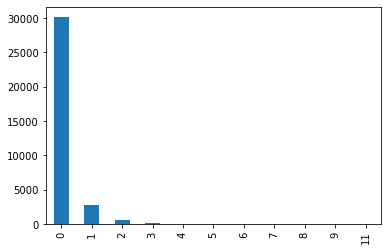

In [103]:
data['delinq_2yrs'].value_counts().plot(kind='bar')

In [104]:
data['delinq_2yrs'].value_counts(normalize=True) * 100

0     89.054844
1      8.400732
2      1.709074
3      0.566739
4      0.162347
5      0.053132
6      0.029518
7      0.011807
8      0.005904
9      0.002952
11     0.002952
Name: delinq_2yrs, dtype: float64

In [105]:
delinq_2yrs_value_counts = data['delinq_2yrs'].value_counts()
df_delinq_2yrs_value_counts = pd.DataFrame(delinq_2yrs_value_counts)
df_delinq_2yrs_value_counts = df_delinq_2yrs_value_counts.reset_index()
df_delinq_2yrs_value_counts.columns = ['delinq_2yrs', 'frequency'] # change column names
df_delinq_2yrs_value_counts['rank'] = range(1,12)
df_delinq_2yrs_value_counts['log_frequency'] = np.log(df_delinq_2yrs_value_counts['frequency'])
df_delinq_2yrs_value_counts

,delinq_2yrs,frequency,rank,log_frequency
0,0,30170,1,10.314603
1,1,2846,2,7.953670
2,2,579,3,6.361302
3,3,192,4,5.257495
4,4,55,5,4.007333
5,5,18,6,2.890372
6,6,10,7,2.302585
7,7,4,8,1.386294
8,8,2,9,0.693147
9,9,1,10,0.000000


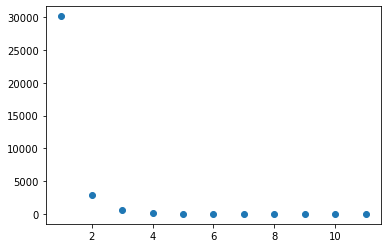

In [106]:
plt.scatter(x='rank', y='frequency', data=df_delinq_2yrs_value_counts)

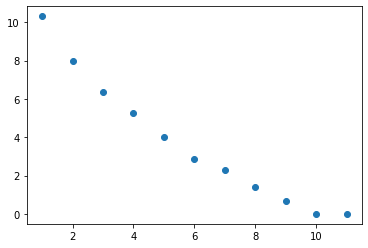

In [107]:
plt.scatter(x='rank', y='log_frequency', data=df_delinq_2yrs_value_counts)

In [108]:
# pivot table for delinq_2yrs and loan_status
group = pd.pivot_table(index='loan_status', columns='delinq_2yrs',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

delinq_2yrs,0,1,2,3,4,5,6,7,8,9,11,All
loan_status,,,,,,,,,,,,
Charged Off,14.269142,16.198173,18.825561,16.145833,21.818182,11.111111,10.0,25.0,50.0,NaN,NaN,14.531554
Fully Paid,85.730858,83.801827,81.174439,83.854167,78.181818,88.888889,90.0,75.0,50.0,100.0,100.0,85.468446


<AxesSubplot:xlabel='delinq_2yrs'>

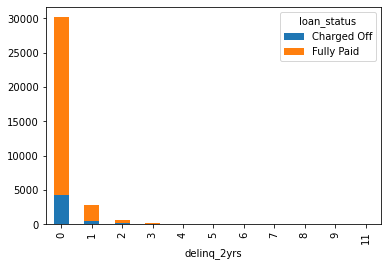

In [109]:
data.groupby('delinq_2yrs')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

In [110]:
data['inq_last_6mths'].value_counts()

0    16436
1     9396
2     4960
3     2615
4      258
5      128
6       47
7       28
8       10
Name: inq_last_6mths, dtype: int64

In [111]:
data['inq_last_6mths'].value_counts(normalize=True) * 100

0    48.515261
1    27.734813
2    14.640770
3     7.718874
4     0.761556
5     0.377826
6     0.138733
7     0.082650
8     0.029518
Name: inq_last_6mths, dtype: float64

In [112]:
inq_last_6mths_value_counts = data['inq_last_6mths'].value_counts()
df_inq_last_6mths_value_counts = pd.DataFrame(inq_last_6mths_value_counts)
df_inq_last_6mths_value_counts = df_inq_last_6mths_value_counts.reset_index()
df_inq_last_6mths_value_counts.columns = ['inq_last_6mths', 'frequency'] # change column names
df_inq_last_6mths_value_counts['rank'] = range(1,10)
df_inq_last_6mths_value_counts['log_frequency'] = np.log(df_inq_last_6mths_value_counts['frequency'])
df_inq_last_6mths_value_counts

,inq_last_6mths,frequency,rank,log_frequency
0,0,16436,1,9.707229
1,1,9396,2,9.148039
2,2,4960,3,8.509161
3,3,2615,4,7.869019
4,4,258,5,5.552960
5,5,128,6,4.852030
6,6,47,7,3.850148
7,7,28,8,3.332205
8,8,10,9,2.302585


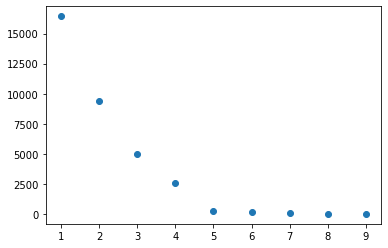

In [113]:
plt.scatter(x='rank', y='frequency', data=df_inq_last_6mths_value_counts)

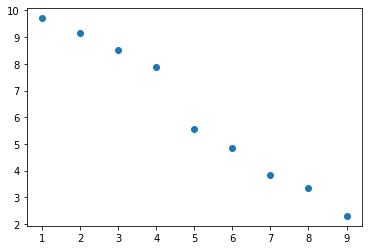

In [114]:
plt.scatter(x='rank', y='log_frequency', data=df_inq_last_6mths_value_counts)

In [115]:
# pivot table for inq_last_6mths and loan_status
group = pd.pivot_table(index='inq_last_6mths', columns='loan_status',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

loan_status,Charged Off,Fully Paid,All
inq_last_6mths,,,
0,40.381881,49.898118,48.515261
1,30.164534,27.321706,27.734813
2,16.636197,14.301502,14.640770
3,11.070485,7.149024,7.718874
4,0.832826,0.749439,0.761556
5,0.487508,0.359178,0.377826
6,0.203128,0.127784,0.138733
7,0.162503,0.069073,0.082650
8,0.060938,0.024175,0.029518


In [116]:
# pivot table for inq_last_6mths and loan_status
group = pd.pivot_table(index='loan_status', columns='inq_last_6mths',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
# As number of inquiries increases, chance of getting charged of increases

inq_last_6mths,0,1,2,3,4,5,6,7,8,All
loan_status,,,,,,,,,,
Charged Off,12.0954,15.804598,16.512097,20.8413,15.891473,18.75,21.276596,28.571429,30.0,14.531554
Fully Paid,87.9046,84.195402,83.487903,79.1587,84.108527,81.25,78.723404,71.428571,70.0,85.468446


<AxesSubplot:xlabel='inq_last_6mths'>

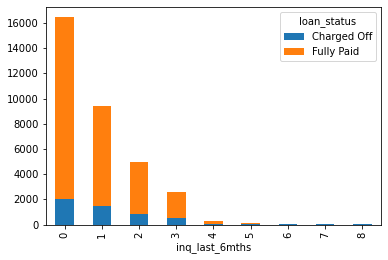

In [117]:
data.groupby('inq_last_6mths')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

In [118]:
open_acc_value_counts = data['open_acc'].value_counts()
df_open_acc_value_counts = pd.DataFrame(open_acc_value_counts)
df_open_acc_value_counts = df_open_acc_value_counts.reset_index()
df_open_acc_value_counts.columns = ['open_acc', 'frequency'] # change column names
df_open_acc_value_counts['rank'] = range(1,40)
df_open_acc_value_counts['log_frequency'] = np.log(df_open_acc_value_counts['frequency'])
df_open_acc_value_counts

,open_acc,frequency,rank,log_frequency
0,7,3575,1,8.181720
1,6,3528,2,8.168486
2,8,3423,3,8.138273
3,9,3201,4,8.071219
4,5,2871,5,7.962416
5,10,2672,6,7.890583
6,11,2281,7,7.732369
7,4,2152,8,7.674153
8,12,1861,9,7.528869
9,13,1539,10,7.338888


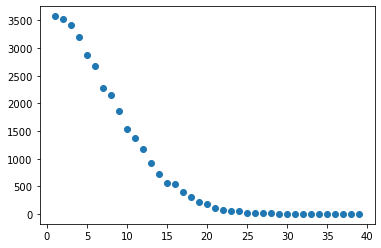

In [119]:
plt.scatter(x='rank', y='frequency', data=df_open_acc_value_counts)

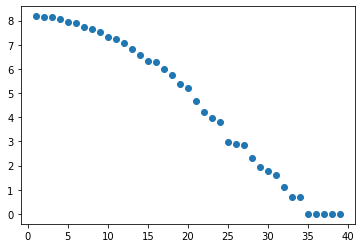

In [120]:
plt.scatter(x='rank', y='log_frequency', data=df_open_acc_value_counts)

In [121]:
# pivot table for vdelinq_2yrs and loan_status
group = pd.pivot_table(index='open_acc', columns='loan_status',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

loan_status,Charged Off,Fully Paid,All
open_acc,,,
2,2.356287,1.478156,1.605762
3,4.793825,3.923329,4.049826
4,6.784481,6.278708,6.352205
5,7.840748,8.582283,8.474526
6,9.993906,10.485236,10.413838
7,10.278286,10.599206,10.552571
8,9.932968,10.132965,10.103902
9,9.161081,9.497496,9.448610
10,8.023563,7.863927,7.887124


In [122]:
# pivot table for open_acc and loan_status
group = pd.pivot_table(index='loan_status', columns='open_acc',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

open_acc,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,41,42,All
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,21.323529,17.201166,15.520446,13.444793,13.945578,14.153846,14.285714,14.089347,14.782934,14.818062,13.487372,14.489929,15.986395,14.594595,10.972222,14.801444,13.861386,14.285714,15.277778,16.129032,12.844037,14.492754,11.538462,22.222222,20.0,23.529412,11.111111,NaN,20.0,50.0,NaN,66.666667,20.0,NaN,NaN,100.0,NaN,NaN,NaN,14.531554
Fully Paid,78.676471,82.798834,84.479554,86.555207,86.054422,85.846154,85.714286,85.910653,85.217066,85.181938,86.512628,85.510071,84.013605,85.405405,89.027778,85.198556,86.138614,85.714286,84.722222,83.870968,87.155963,85.507246,88.461538,77.777778,80.0,76.470588,88.888889,100.0,80.0,50.0,100.0,33.333333,80.0,100.0,100.0,NaN,100.0,100.0,100.0,85.468446


<AxesSubplot:ylabel='Frequency'>

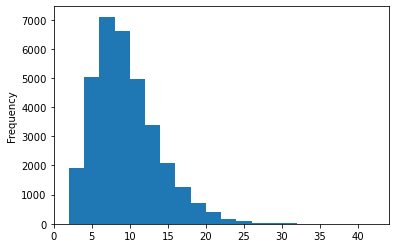

In [123]:
data.open_acc.plot.hist(bins=20)

<AxesSubplot:xlabel='open_acc'>

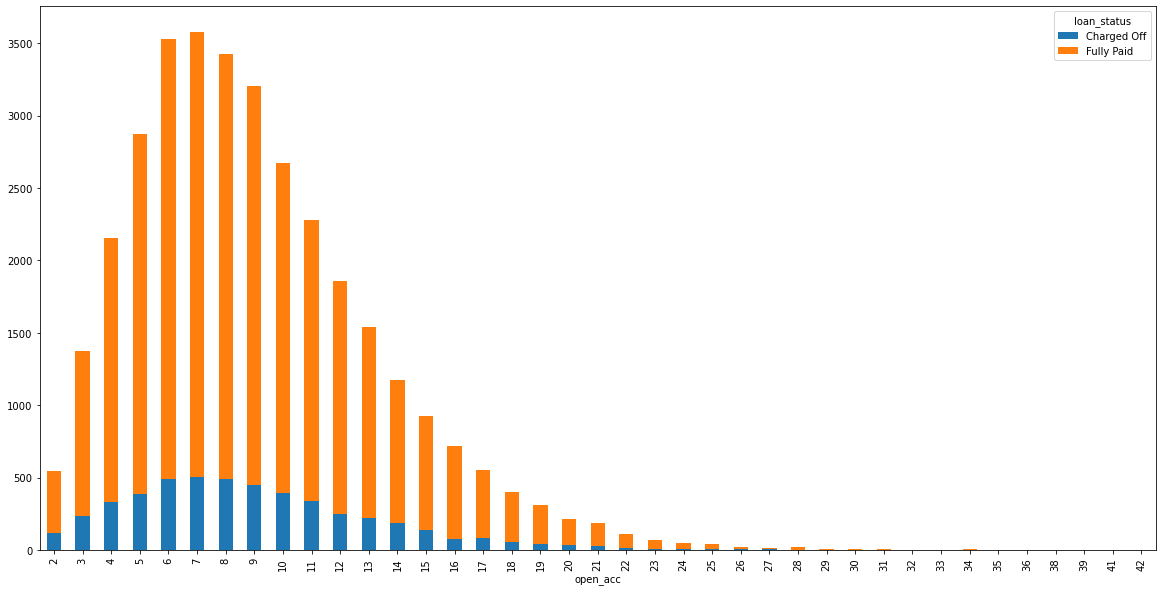

In [124]:
data.groupby('open_acc')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True, figsize=(20,10))
#Most customers have 4 to 12 open accounts

In [125]:
data['pub_rec'].value_counts()

0    31998
1     1829
2       43
3        6
4        2
Name: pub_rec, dtype: int64

In [126]:
data['pub_rec'].value_counts(normalize=True) * 100

0    94.450676
1     5.398784
2     0.126926
3     0.017711
4     0.005904
Name: pub_rec, dtype: float64

In [127]:
pub_rec_value_counts = data['pub_rec'].value_counts()
df_pub_rec_value_counts = pd.DataFrame(pub_rec_value_counts)
df_pub_rec_value_counts = df_pub_rec_value_counts.reset_index()
df_pub_rec_value_counts.columns = ['pub_rec', 'frequency'] # change column names
df_pub_rec_value_counts['rank'] = range(1,6)
df_pub_rec_value_counts['log_frequency'] = np.log(df_pub_rec_value_counts['frequency'])
df_pub_rec_value_counts

,pub_rec,frequency,rank,log_frequency
0,0,31998,1,10.373429
1,1,1829,2,7.511525
2,2,43,3,3.761200
3,3,6,4,1.791759
4,4,2,5,0.693147


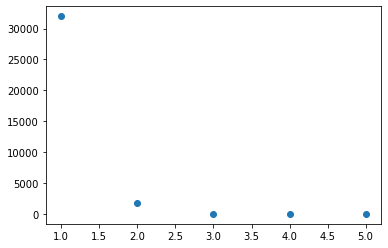

In [128]:
plt.scatter(x='rank', y='frequency', data=df_pub_rec_value_counts)

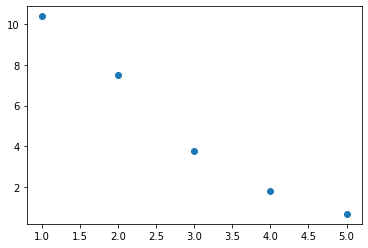

In [129]:
plt.scatter(x='rank', y='log_frequency', data=df_pub_rec_value_counts)

In [130]:
# pivot table for pub_rec and loan_status
group = pd.pivot_table(index='loan_status', columns='pub_rec',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

pub_rec,0,1,2,3,4,All
loan_status,,,,,,
Charged Off,14.07588,22.361946,23.255814,NaN,NaN,14.531554
Fully Paid,85.92412,77.638054,76.744186,100.0,100.0,85.468446


In [131]:
# pivot table for pub_rec and loan_status
group = pd.pivot_table(index='pub_rec', columns='loan_status',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

loan_status,Charged Off,Fully Paid,All
pub_rec,,,
0,91.488930,94.954239,94.450676
1,8.307942,4.904162,5.398784
2,0.203128,0.113970,0.126926
3,NaN,0.020722,0.017711
4,NaN,0.006907,0.005904


<AxesSubplot:xlabel='pub_rec'>

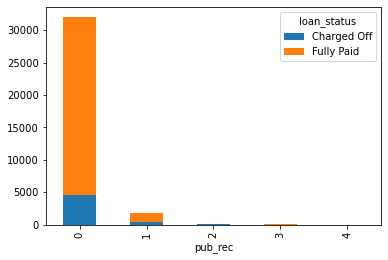

In [132]:
data.groupby('pub_rec')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

<AxesSubplot:ylabel='Frequency'>

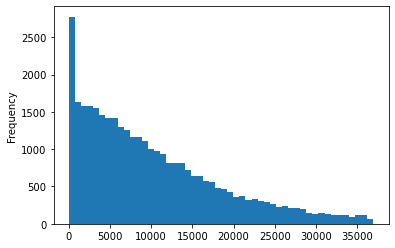

In [133]:
data['revol_bal'].plot.hist(bins=50)

In [134]:
ranges = [0,5000,10000,15000,20000,25000,30000,35000,40000]
data.groupby([pd.cut(data.revol_bal, ranges), 'loan_status'])['loan_status'].count()

revol_bal       loan_status
(0, 5000]       Charged Off    1445
                Fully Paid     9323
(5000, 10000]   Charged Off    1214
                Fully Paid     7086
(10000, 15000]  Charged Off     849
                Fully Paid     4908
(15000, 20000]  Charged Off     546
                Fully Paid     3056
(20000, 25000]  Charged Off     347
                Fully Paid     1808
(25000, 30000]  Charged Off     205
                Fully Paid     1144
(30000, 35000]  Charged Off     120
                Fully Paid      680
(35000, 40000]  Charged Off      54
                Fully Paid      205
Name: loan_status, dtype: int64

In [135]:
ranges = [0,5000,10000,15000,20000,25000,30000,35000,40000]
df_revol_bal=data.groupby([pd.cut(data.revol_bal, ranges), 'loan_status'])['loan_status'].count()
df_revol_bal_pcts = df_revol_bal.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_revol_bal_pcts
# revol_bal = Total credit revolving balance
# Higher the amount of credit balance borrower uses, higher the chance of getting charged off 
# as then they will have less amount remaining of paying loan

revol_bal       loan_status
(0, 5000]       Charged Off    13.419391
                Fully Paid     86.580609
(5000, 10000]   Charged Off    14.626506
                Fully Paid     85.373494
(10000, 15000]  Charged Off    14.747264
                Fully Paid     85.252736
(15000, 20000]  Charged Off    15.158245
                Fully Paid     84.841755
(20000, 25000]  Charged Off    16.102088
                Fully Paid     83.897912
(25000, 30000]  Charged Off    15.196442
                Fully Paid     84.803558
(30000, 35000]  Charged Off    15.000000
                Fully Paid     85.000000
(35000, 40000]  Charged Off    20.849421
                Fully Paid     79.150579
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='revol_bal'>

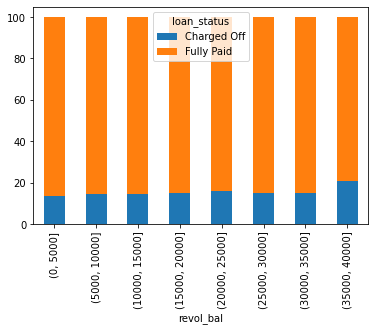

In [136]:
df_revol_bal.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar',stacked=True)

<AxesSubplot:ylabel='Frequency'>

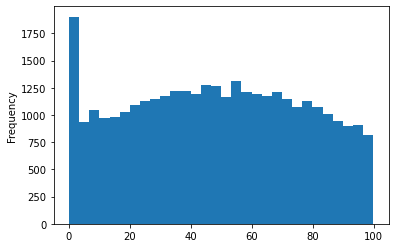

In [137]:
data['revol_util'].plot.hist(bins=30)

In [138]:
ranges = [0,10,20,30,40,50,60,70,80,90,100]
data.groupby([pd.cut(data.revol_util, ranges), 'loan_status'])['loan_status'].count()

revol_util  loan_status
(0, 10]     Charged Off     260
            Fully Paid     2820
(10, 20]    Charged Off     306
            Fully Paid     2683
(20, 30]    Charged Off     377
            Fully Paid     2973
(30, 40]    Charged Off     458
            Fully Paid     3164
(40, 50]    Charged Off     534
            Fully Paid     3209
(50, 60]    Charged Off     545
            Fully Paid     3139
(60, 70]    Charged Off     576
            Fully Paid     2998
(70, 80]    Charged Off     607
            Fully Paid     2746
(80, 90]    Charged Off     564
            Fully Paid     2449
(90, 100]   Charged Off     554
            Fully Paid     2034
Name: loan_status, dtype: int64

In [139]:
ranges = [0,10,20,30,40,50,60,70,80,90,100]
df_revol_util=data.groupby([pd.cut(data.revol_util, ranges), 'loan_status'])['loan_status'].count()
df_revol_util_pcts = df_revol_util.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_revol_util_pcts

revol_util  loan_status
(0, 10]     Charged Off     8.441558
            Fully Paid     91.558442
(10, 20]    Charged Off    10.237538
            Fully Paid     89.762462
(20, 30]    Charged Off    11.253731
            Fully Paid     88.746269
(30, 40]    Charged Off    12.644948
            Fully Paid     87.355052
(40, 50]    Charged Off    14.266631
            Fully Paid     85.733369
(50, 60]    Charged Off    14.793702
            Fully Paid     85.206298
(60, 70]    Charged Off    16.116396
            Fully Paid     83.883604
(70, 80]    Charged Off    18.103191
            Fully Paid     81.896809
(80, 90]    Charged Off    18.718885
            Fully Paid     81.281115
(90, 100]   Charged Off    21.406491
            Fully Paid     78.593509
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='revol_util'>

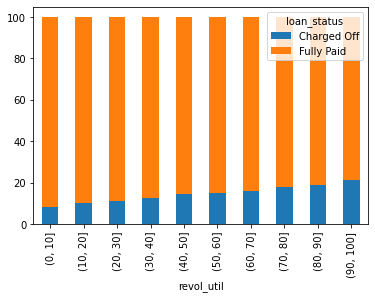

In [140]:
df_revol_util.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar',stacked=True)

In [141]:
total_acc_value_counts = data['total_acc'].value_counts()
df_total_acc_value_counts = pd.DataFrame(total_acc_value_counts)
df_total_acc_value_counts = df_total_acc_value_counts.reset_index()
df_total_acc_value_counts.columns = ['total_acc', 'frequency'] # change column names
df_total_acc_value_counts['rank'] = range(1,79)
df_total_acc_value_counts['log_frequency'] = np.log(df_total_acc_value_counts['frequency'])
df_total_acc_value_counts['log_rank'] = np.log(df_total_acc_value_counts['rank'])
df_total_acc_value_counts

,total_acc,frequency,rank,log_frequency,log_rank
0,15,1329,1,7.192182,0.000000
1,16,1308,2,7.176255,0.693147
2,14,1304,3,7.173192,1.098612
3,13,1281,4,7.155396,1.386294
4,17,1271,5,7.147559,1.609438
5,20,1265,6,7.142827,1.791759
6,18,1258,7,7.137278,1.945910
7,12,1229,8,7.113956,2.079442
8,21,1210,9,7.098376,2.197225
9,19,1178,10,7.071573,2.302585


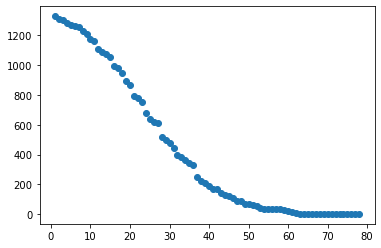

In [142]:
plt.scatter(x='rank', y='frequency', data=df_total_acc_value_counts)

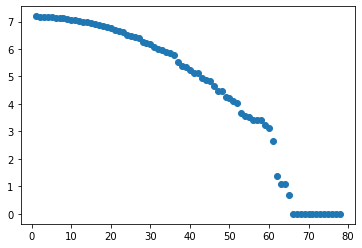

In [143]:
plt.scatter(x='rank', y='log_frequency', data=df_total_acc_value_counts)

In [144]:
# pivot table for vdelinq_2yrs and loan_status
group = pd.pivot_table(index='loan_status', columns='total_acc',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

total_acc,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,71,72,73,74,76,79,80,81,87,90,All
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,33.333333,24.852071,18.592965,16.122841,15.444618,16.025641,17.566138,15.175879,15.59633,15.979381,15.134255,13.739266,16.48773,13.844996,16.055046,14.555468,13.116057,15.365025,13.12253,12.809917,11.960432,13.96648,14.962121,12.334353,12.082854,12.192394,14.08805,13.509934,16.248154,15.0,11.783961,17.102616,12.291667,15.646259,16.883117,12.707182,14.242424,15.451895,14.056225,15.238095,13.181818,19.473684,13.017751,20.0,17.482517,11.290323,14.150943,13.793103,6.741573,7.142857,5.882353,8.196721,12.820513,17.142857,11.764706,12.903226,4.347826,12.903226,35.714286,12.903226,20.0,10.0,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,14.531554
Fully Paid,66.666667,75.147929,81.407035,83.877159,84.555382,83.974359,82.433862,84.824121,84.40367,84.020619,84.865745,86.260734,83.51227,86.155004,83.944954,85.444532,86.883943,84.634975,86.87747,87.190083,88.039568,86.03352,85.037879,87.665647,87.917146,87.807606,85.91195,86.490066,83.751846,85.0,88.216039,82.897384,87.708333,84.353741,83.116883,87.292818,85.757576,84.548105,85.943775,84.761905,86.818182,80.526316,86.982249,80.0,82.517483,88.709677,85.849057,86.206897,93.258427,92.857143,94.117647,91.803279,87.179487,82.857143,88.235294,87.096774,95.652174,87.096774,64.285714,87.096774,80.0,90.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,100.0,100.0,100.0,100.0,100.0,100.0,85.468446


<AxesSubplot:ylabel='Frequency'>

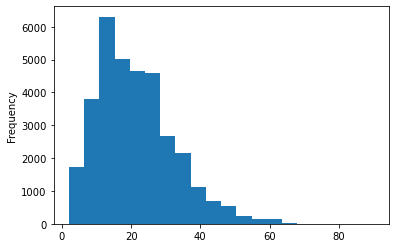

In [145]:
data['total_acc'].plot.hist(bins=20)

In [146]:
data['total_acc'].value_counts()

15    1329
16    1308
14    1304
13    1281
17    1271
20    1265
18    1258
12    1229
21    1210
19    1178
11    1164
22    1112
10    1090
23    1074
24    1056
9      995
25     981
8      945
27     894
26     869
28     795
7      780
29     755
30     677
6      641
31     620
32     611
5      521
33     497
34     480
35     441
4      398
36     385
37     362
39     343
38     330
40     249
42     220
41     210
43     190
3      169
44     169
46     143
45     130
47     124
48     106
50      89
49      87
63      70
52      68
53      61
51      56
54      39
55      35
56      34
61      31
59      31
57      31
62      25
58      23
60      14
66       4
64       3
2        3
67       2
65       1
68       1
73       1
69       1
71       1
72       1
80       1
90       1
81       1
79       1
74       1
87       1
76       1
Name: total_acc, dtype: int64

<AxesSubplot:xlabel='total_acc'>

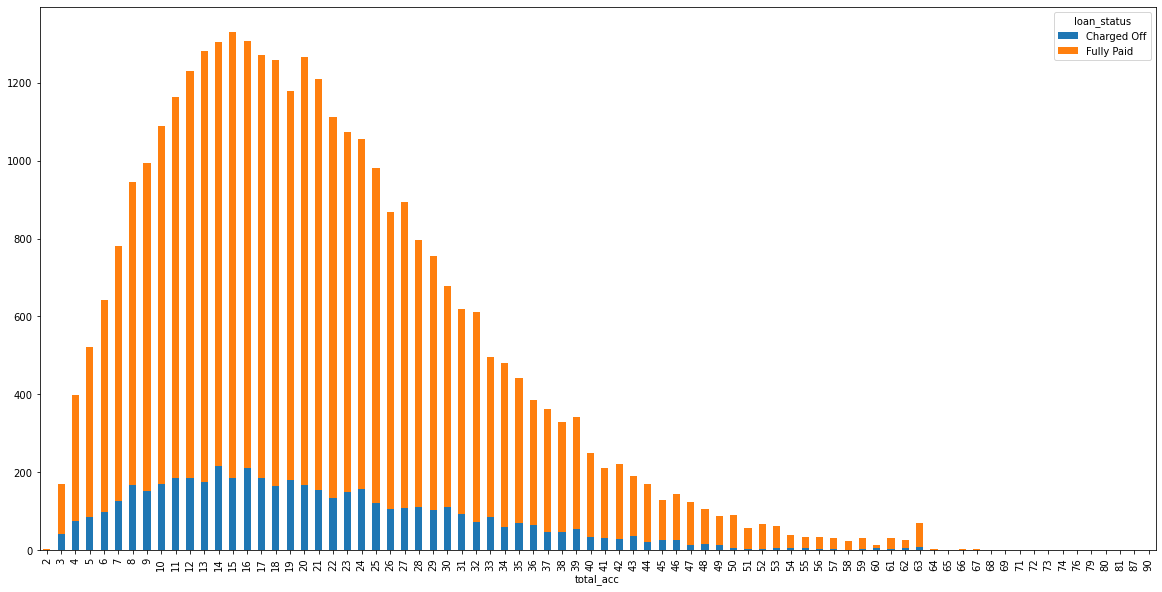

In [147]:
data.groupby('total_acc')['loan_status'].value_counts().unstack().plot(kind='bar', figsize=(20,10), stacked=True)
#Total acocunts for customers have wide range

In [148]:
data['pub_rec_bankruptcies'].value_counts()

0.0    31773
1.0     1476
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [149]:
# pivot table for pub_rec and loan_status
group = pd.pivot_table(index='loan_status', columns='pub_rec_bankruptcies',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
#Greater the value of pub_rec_bankruptcies, higher chance of getting charged off

pub_rec_bankruptcies,0.0,1.0,2.0,All
loan_status,,,,
Charged Off,14.131495,22.01897,40.0,14.485475
Fully Paid,85.868505,77.98103,60.0,85.514525


In [150]:
pub_rec_bankruptcies_value_counts = data['pub_rec_bankruptcies'].value_counts()
df_pub_rec_bankruptcies_value_counts = pd.DataFrame(pub_rec_bankruptcies_value_counts)
df_pub_rec_bankruptcies_value_counts = df_pub_rec_bankruptcies_value_counts.reset_index()
df_pub_rec_bankruptcies_value_counts.columns = ['pub_rec_bankruptcies', 'frequency'] # change column names
df_pub_rec_bankruptcies_value_counts['rank'] = range(1,4)
df_pub_rec_bankruptcies_value_counts['log_frequency'] = np.log(df_pub_rec_bankruptcies_value_counts['frequency'])
df_pub_rec_bankruptcies_value_counts

,pub_rec_bankruptcies,frequency,rank,log_frequency
0,0.0,31773,1,10.366372
1,1.0,1476,2,7.297091
2,2.0,5,3,1.609438


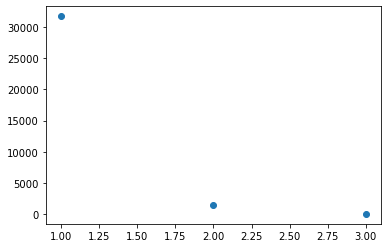

In [151]:
plt.scatter(x='rank', y='frequency', data=df_pub_rec_bankruptcies_value_counts)

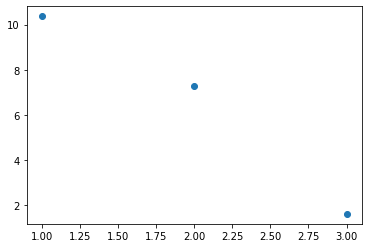

In [152]:
plt.scatter(x='rank', y='log_frequency', data=df_pub_rec_bankruptcies_value_counts)

<AxesSubplot:xlabel='issue_d_year,issue_d_month'>

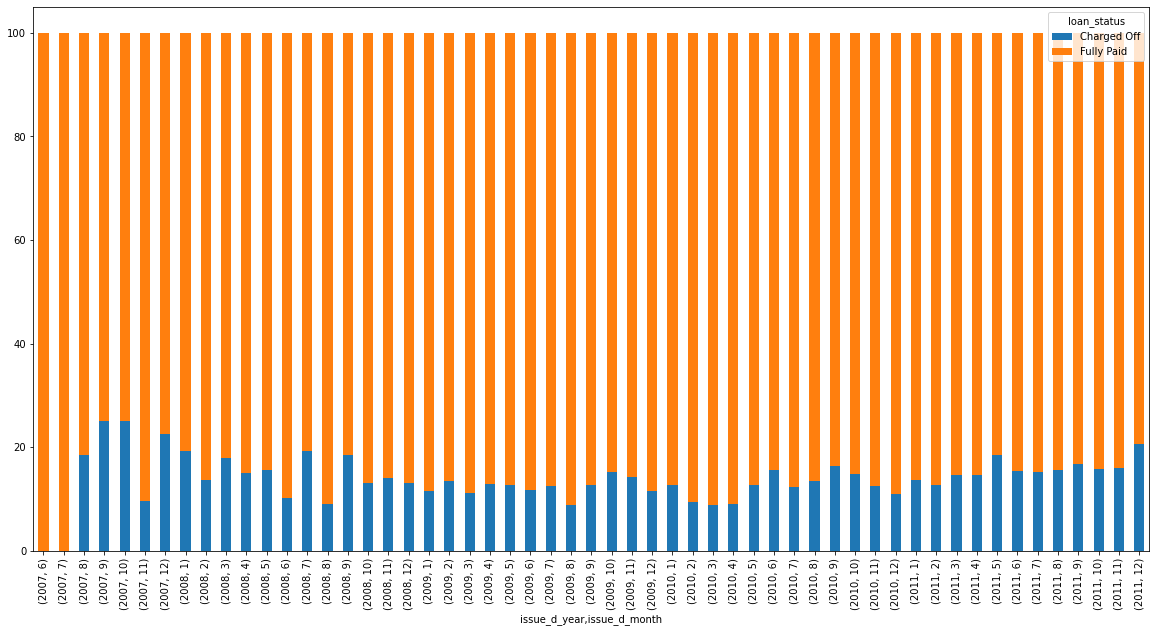

In [153]:
(data.groupby(['issue_d_year','issue_d_month'])['loan_status'].value_counts(normalize=True) * 100).unstack().plot(kind='bar', figsize=(20,10), stacked=True)

<AxesSubplot:xlabel='issue_d_year'>

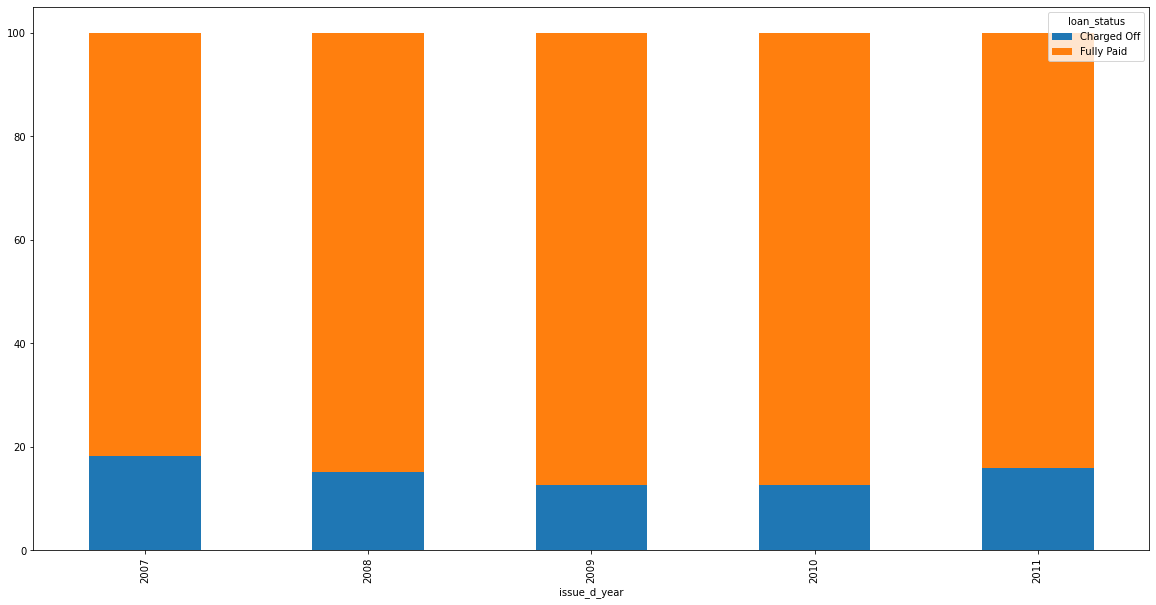

In [154]:
(data.groupby(['issue_d_year'])['loan_status'].value_counts(normalize=True) * 100).unstack().plot(kind='bar', figsize=(20,10), stacked=True)

<AxesSubplot:xlabel='issue_d_month'>

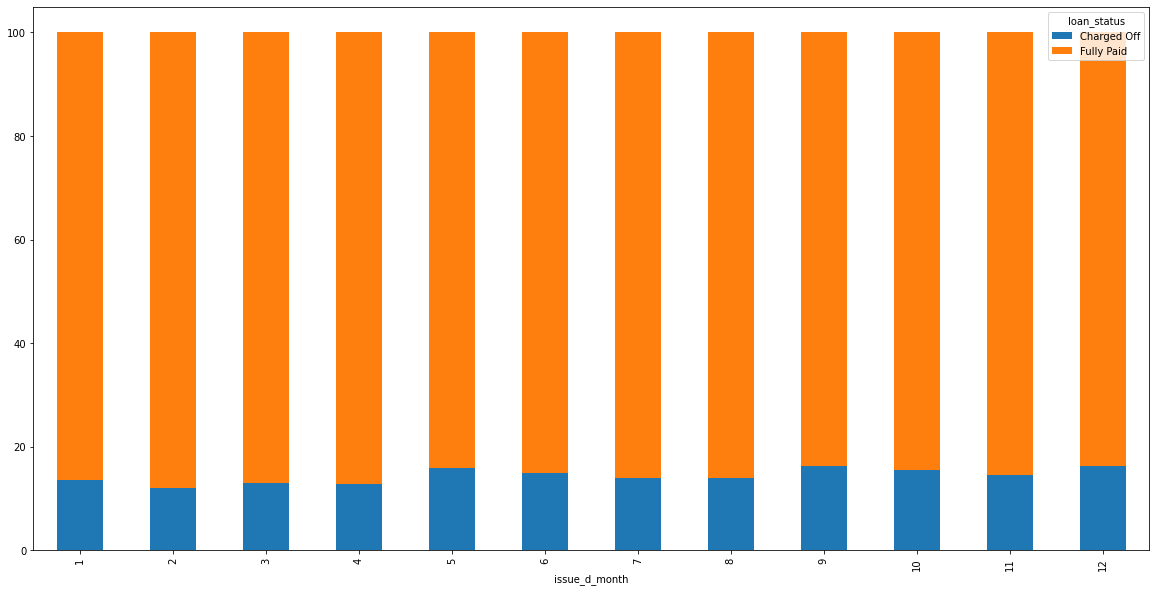

In [155]:
(data.groupby(['issue_d_month'])['loan_status'].value_counts(normalize=True) * 100).unstack().plot(kind='bar', figsize=(20,10), stacked=True)

In [156]:
group = pd.pivot_table(index='loan_status', columns='issue_d_month',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

issue_d_month,1,2,3,4,5,6,7,8,9,10,11,12,All
loan_status,,,,,,,,,,,,,
Charged Off,13.610315,11.959654,12.946616,12.790698,15.926791,14.897445,13.866397,13.962013,16.164293,15.489467,14.59583,16.184664,14.531554
Fully Paid,86.389685,88.040346,87.053384,87.209302,84.073209,85.102555,86.133603,86.037987,83.835707,84.510533,85.40417,83.815336,85.468446


In [157]:
group = pd.pivot_table(index='loan_status', columns='issue_d_year',  values='id', data=data, aggfunc='count', fill_value=0, margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

issue_d_year,2007,2008,2009,2010,2011,All
loan_status,,,,,,
Charged Off,18.224299,15.103794,12.541568,12.624323,15.992627,14.531554
Fully Paid,81.775701,84.896206,87.458432,87.375677,84.007373,85.468446


In [158]:
group = pd.pivot_table(index='loan_status', columns='last_pymnt_d_month',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

last_pymnt_d_month,1,2,3,4,5,6,7,8,9,10,11,12,All
loan_status,,,,,,,,,,,,,
Charged Off,13.586752,13.089748,11.418269,14.125317,14.306152,15.748642,16.104079,14.225795,15.657143,16.533241,15.029126,13.372093,14.367255
Fully Paid,86.413248,86.910252,88.581731,85.874683,85.693848,84.251358,83.895921,85.774205,84.342857,83.466759,84.970874,86.627907,85.632745


In [159]:
group = pd.pivot_table(index='loan_status', columns='last_pymnt_d_year',  values='id', data=data, aggfunc='count', margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

last_pymnt_d_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
loan_status,,,,,,,,,,
Charged Off,34.745763,39.484127,26.961395,20.402169,18.882003,12.858175,6.523626,8.761905,1.404853,14.367255
Fully Paid,65.254237,60.515873,73.038605,79.597831,81.117997,87.141825,93.476374,91.238095,98.595147,85.632745


In [160]:
# Add new column 'ChargedOff' based on value of 'loan_status' column
data['ChargedOff'] = data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [161]:
datacormatrix = data.corr()
datacormatrix

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,ChargedOff
id,1.000000,0.120276,0.130687,0.233874,0.172943,0.054815,0.075911,0.113690,0.049755,0.096778,-0.009308,-0.040169,0.114865,0.691197,0.024875,-0.018340,0.044605,0.101396,0.044301,NaN,NaN,0.105932,0.193597,0.087810,0.120835,-0.061695,0.040225,-0.010602,0.141064,-0.009163,0.846877,0.391793,0.068522,-0.019423,0.541347,0.105569,0.284830,0.035721,0.046430
loan_amnt,0.120276,1.000000,0.982646,0.936446,0.348138,0.279349,0.931974,0.146499,0.391186,0.075787,-0.038037,0.007271,0.028308,0.021576,0.152436,-0.035589,0.371744,0.057217,0.229878,NaN,NaN,0.873896,0.837875,0.835960,0.721049,0.038032,0.141775,0.071934,0.466702,-0.019763,0.108133,0.053782,-0.155821,-0.012955,0.095941,-0.003756,0.055927,-0.013848,0.070786
funded_amnt,0.130687,0.982646,1.000000,0.953792,0.328088,0.284128,0.956667,0.146826,0.387734,0.075760,-0.037887,0.007800,0.028005,0.010809,0.151057,-0.036440,0.367689,0.062080,0.224694,NaN,NaN,0.890378,0.854410,0.853521,0.729753,0.041115,0.143037,0.073749,0.471158,-0.020945,0.118756,0.043741,-0.149941,-0.012745,0.097269,-0.006062,0.058142,-0.016167,0.068023
funded_amnt_inv,0.233874,0.936446,0.953792,1.000000,0.348297,0.278065,0.900769,0.158444,0.373463,0.085007,-0.043394,-0.006748,0.083606,0.447200,0.140232,-0.039036,0.348022,0.068705,0.219431,NaN,NaN,0.865469,0.901502,0.827023,0.719824,0.022092,0.129880,0.058906,0.462780,-0.027046,0.254435,0.071034,-0.132676,-0.013991,0.198283,0.002247,0.109264,-0.012772,0.049173
term,0.172943,0.348138,0.328088,0.348297,1.000000,0.436170,0.089525,0.103980,0.076921,0.077139,0.006850,0.048869,0.033016,0.287187,0.040785,0.016661,0.088759,0.062407,0.089550,NaN,NaN,0.302831,0.319794,0.195433,0.510170,0.012766,0.111534,0.034776,0.266871,0.021710,0.235314,0.032891,-0.039181,-0.019188,0.317128,-0.017109,0.138123,-0.018561,0.179333
int_rate,0.054815,0.279349,0.284128,0.278065,0.436170,1.000000,0.256728,-0.002879,0.038547,0.107464,0.155163,0.135479,-0.051551,0.326306,-0.016692,0.106621,0.133167,0.468992,-0.073961,NaN,NaN,0.268663,0.264190,0.150475,0.512132,0.091733,0.125994,0.063853,0.158642,0.089564,0.039102,0.028508,0.127167,-0.011734,0.058110,-0.004826,0.056153,-0.010736,0.216334
installment,0.075911,0.931974,0.956667,0.900769,0.089525,0.256728,1.000000,0.119795,0.386101,0.065082,-0.026511,0.005814,0.014561,-0.045961,0.146871,-0.032237,0.371582,0.090229,0.202236,NaN,NaN,0.851550,0.807831,0.839169,0.634860,0.049300,0.121240,0.072496,0.405291,-0.018012,0.050510,0.031154,-0.133384,-0.008441,0.013362,-0.000637,0.025620,-0.011909,0.036388
emp_length,0.113690,0.146499,0.146826,0.158444,0.103980,-0.002879,0.119795,1.000000,0.186645,0.048209,0.017421,0.012458,0.054262,0.252304,0.087419,0.074500,0.150757,0.001254,0.205527,NaN,NaN,0.128064,0.139321,0.119289,0.115505,-0.019658,0.019911,0.000338,0.079910,0.071988,0.120787,0.024773,-0.262115,-0.044838,0.094138,0.017794,0.076943,-0.001704,0.019284
annual_inc,0.049755,0.391186,0.387734,0.373463,0.076921,0.038547,0.386101,0.186645,1.000000,-0.116194,0.035131,0.038260,0.008780,0.096522,0.237971,0.010161,0.330543,0.010392,0.368185,NaN,NaN,0.369435,0.357298,0.372006,0.256950,-0.003937,0.035824,0.018498,0.217977,0.013235,0.057163,0.014498,-0.255075,-0.019238,0.029730,-0.004878,0.037601,-0.023245,-0.065967
dti,0.096778,0.075787,0.075760,0.085007,0.077139,0.107464,0.065082,0.048209,-0.116194,1.000000,-0.030554,0.009473,0.071265,0.188859,0.292366,-0.001874,0.319705,0.266550,0.235462,NaN,NaN,0.073587,0.080817,0.051934,0.112019,-0.0

In [162]:
# From the above correlation values: higher the value of term, int_rate high there is high chance of charged off
# Higer the value of annual income, low chance of charged off

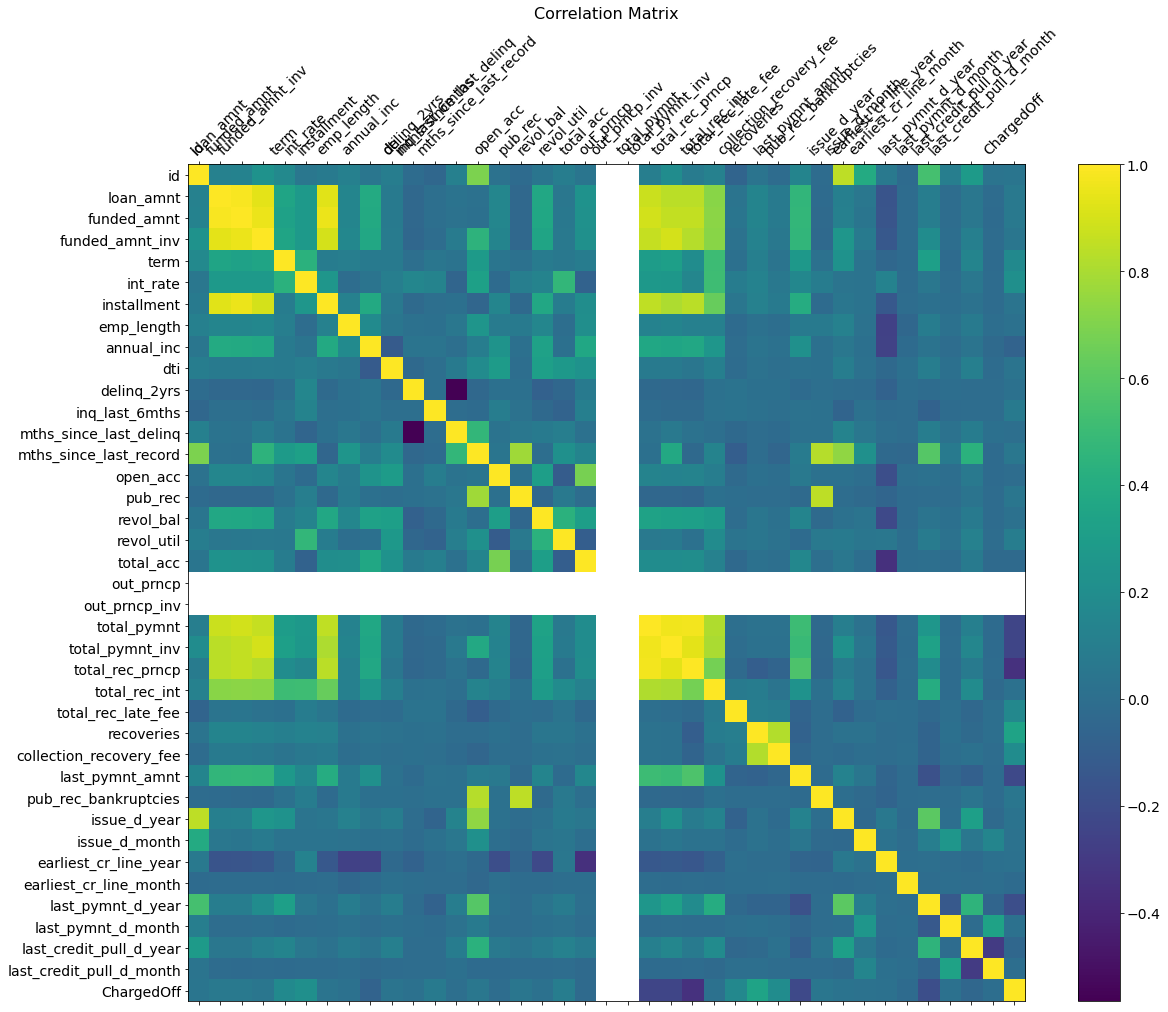

In [163]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(19, 15))
plt.matshow(datacormatrix, fignum=f.number)
plt.xticks(range(datacormatrix.select_dtypes(['number']).shape[1]), datacormatrix.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(datacormatrix.select_dtypes(['number']).shape[1]), datacormatrix.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [164]:
group = pd.pivot_table(index='home_ownership', columns='verification_status',  values='ChargedOff', data=data, aggfunc='sum', fill_value=0, margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
#home_ownership=RENT and verification_status=Not Verified,  have high chance of ChargedOff

verification_status,Not Verified,Source Verified,Verified,All
home_ownership,,,,
MORTGAGE,36.649215,32.148377,46.713205,38.980297
NONE,0.000000,0.000000,0.000000,0.000000
OTHER,0.523560,0.077280,0.349040,0.345318
OWN,8.534031,7.882535,6.515416,7.657932
RENT,54.293194,59.891808,46.422339,53.016453


In [165]:
group = pd.pivot_table(index='verification_status', columns='purpose',  values='ChargedOff', data=data, aggfunc='sum', fill_value=0, margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100
#purpose=medical/other/vacation and verification_status=Not Verified, have high chance of ChargedOff

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,All
verification_status,,,,,,,,,,,,,,,
Not Verified,42.465753,38.513514,35.134037,68.750000,41.237113,43.137255,43.627451,49.484536,38.271605,50.559701,47.058824,33.740831,46.938776,32.954545,38.797481
Source Verified,33.561644,26.351351,25.264013,8.333333,25.429553,27.450980,31.372549,27.835052,49.382716,26.119403,23.529412,23.960880,30.612245,29.545455,26.284786
Verified,23.972603,35.135135,39.601950,22.916667,33.333333,29.411765,25.000000,22.680412,12.345679,23.320896,29.411765,42.298289,22.448980,37.500000,34.917733


In [166]:
group = pd.pivot_table(index='verification_status', columns='purpose',  values='ChargedOff', data=data, aggfunc='sum', fill_value=0, margins=True)
group.iloc[:-1].div(group.iloc[-1], axis=1) * 100

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,All
verification_status,,,,,,,,,,,,,,,
Not Verified,42.465753,38.513514,35.134037,68.750000,41.237113,43.137255,43.627451,49.484536,38.271605,50.559701,47.058824,33.740831,46.938776,32.954545,38.797481
Source Verified,33.561644,26.351351,25.264013,8.333333,25.429553,27.450980,31.372549,27.835052,49.382716,26.119403,23.529412,23.960880,30.612245,29.545455,26.284786
Verified,23.972603,35.135135,39.601950,22.916667,33.333333,29.411765,25.000000,22.680412,12.345679,23.320896,29.411765,42.298289,22.448980,37.500000,34.917733
